## OpenLane Colab

This Google Colab notebook will:
* Install OpenLane and its dependencies
* Run a simple design, namely a serial-parallel multiplier, through the flow
  and targeting the [open source sky130 PDK](https://github.com/google/skywater-pdk/)
  by Google and Skywater.

In [ ]:
# @title Setup Nix {display-mode: "form"}
# @markdown <img src="https://raw.githubusercontent.com/NixOS/nixos-artwork/master/logo/nix-snowflake.svg" width="32"/>
# @markdown
# @markdown Nix is a package manager with an emphasis on reproducible builds,
# @markdown and it is the primary method for installing OpenLane 2.
# @markdown
# @markdown This step installs the Nix package manager and enables the
# @markdown experimental "flakes" feature.
# @markdown
# @markdown If you're not in a Colab, this just sets the environment variables.
# @markdown You will need to install Nix and enable flakes on your own following
# @markdown [this guide](https://openlane2.readthedocs.io/en/stable/getting_started/common/nix_installation/index.html).
import os
import sys
import shutil

os.environ["LOCALE_ARCHIVE"] = "/usr/lib/locale/locale-archive"

if "google.colab" in sys.modules:
    if shutil.which("nix-env") is None:
        !curl -L https://nixos.org/nix/install | bash -s -- --daemon --yes
        !echo "extra-experimental-features = nix-command flakes" >> /etc/nix/nix.conf
        !killall nix-daemon
else:
    if shutil.which("nix-env") is None:
        raise RuntimeError("Nix is not installed!")

os.environ["PATH"] = f"/nix/var/nix/profiles/default/bin/:{os.getenv('PATH')}"

In [1]:
import os
import subprocess
import IPython
import sys
result = subprocess.run('bash -c "source /etc/network_turbo && env | grep proxy"', shell=True, capture_output=True, text=True)
output = result.stdout
for line in output.splitlines():
    if '=' in line:
        var, value = line.split('=', 1)
        os.environ[var] = value
openlane_version = "latest"  # @param {key:"OpenLane Version", type:"string"}

if openlane_version == "latest":
    openlane_version = "main"

pdk_root = "~/.volare"  # @param {key:"PDK Root", type:"string"}
pdk_root = os.path.expanduser(pdk_root)

pdk = "sky130"  # @param {key:"PDK (without the variant)", type:"string"}

openlane_ipynb_path = os.path.join(os.getcwd(), "openlane_ipynb")

display(IPython.display.HTML("<h3>Downloading OpenLane…</a>"))

TESTING_LOCALLY = False
!rm -rf {openlane_ipynb_path}
!mkdir -p {openlane_ipynb_path}
if TESTING_LOCALLY:
    !ln -s {os.getcwd()} {openlane_ipynb_path}
else:
    !curl -L "https://github.com/efabless/openlane2/tarball/{openlane_version}" | tar -xzC {openlane_ipynb_path} --strip-components 1

try:
    import tkinter
except ImportError:
    if "google.colab" in sys.modules:
        !sudo apt-get install python-tk

try:
    import tkinter
except ImportError as e:
    display(
        IPython.display.HTML(
            '<h3 style="color: #800020";>❌ Failed to import the <code>tkinter</code> library for Python, which is required to load PDK configuration values. Make sure <code>python3-tk</code> or equivalent is installed on your system.</a>'
        )
    )
    raise e from None

# 手动添加 Nix 的路径到环境变量
os.environ["PATH"] = "/nix/var/nix/profiles/default/bin:" + os.environ["PATH"]

display(IPython.display.HTML("<h3>Downloading OpenLane's dependencies…</a>"))
try:
    subprocess.check_call(
        ["nix", "profile", "install", ".#colab-env", "--accept-flake-config"],
        cwd=openlane_ipynb_path,
    )
except subprocess.CalledProcessError as e:
    display(
        IPython.display.HTML(
            '<h3 style="color: #800020";>❌ Failed to install binary dependencies using Nix…</h3>'
        )
    )
    raise e

display(IPython.display.HTML("<h3>Downloading Python dependencies using PIP…</a>"))
try:
    subprocess.check_call(
        ["pip3", "install", "."],
        cwd=openlane_ipynb_path,
    )
except subprocess.CalledProcessError as e:
    display(
        IPython.display.HTML(
            '<h3 style="color: #800020";>❌ Failed to install Python dependencies using PIP…</h3>'
        )
    )
    raise e

display(IPython.display.HTML("<h3>Downloading PDK…</a>"))
import volare

volare.enable(
    volare.get_volare_home(pdk_root),
    pdk,
    open(
        os.path.join(openlane_ipynb_path, "openlane", "open_pdks_rev"),
        encoding="utf8",
    )
    .read()
    .strip(),
)

sys.path.insert(0, openlane_ipynb_path)
display(IPython.display.HTML("<h3>⭕️ Done.</a>"))

import logging

# Remove the default colab logging handler
logging.getLogger().handlers.clear()


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 9439k    0 9439k    0     0  4116k      0 --:--:--  0:00:02 --:--:-- 54.5M


copying path '/nix/store/i1aw9jjgxcvyd642s12kw3iasmarwd42-source' from 'https://cache.nixos.org'...
this derivation will be built:
  /nix/store/d159xaz7ndq087r8g0c4x7bvwljgjf6i-openlane-colab-env.drv
these 354 paths will be fetched (760.74 MiB download, 4172.36 MiB unpacked):
  /nix/store/wmwgqi3w2q5gk1nl6pjqkhblqnh9gq8r-abseil-cpp-20210324.2
  /nix/store/hx8k94a5jddw4f5ipbk444v2rlp1dhsp-abseil-cpp-20220623.2
  /nix/store/ha7gbcgbp9bv4hmll7ghy7kqrcpyjlka-abseil-cpp-20240116.2
  /nix/store/mjgi65m3hgzqqvqcix848gskkw5zzwi9-acl-2.3.2
  /nix/store/0g7r7krqiz6g3nb3651sfa5myd9gqkzf-alsa-lib-1.2.11
  /nix/store/k3rllmlx64awzszan2d17kyl9mb8p3pr-alsa-topology-conf-1.2.5.1
  /nix/store/xdb66yb8cqghrrc8j8rgpr31mhdmyp0m-alsa-ucm-conf-1.2.11
  /nix/store/n4ipmip39rmapwnypvq5kk31w6aq7gyg-antlr-runtime-cpp-4.13.0
  /nix/store/6rigmq2ycbpgywmq9jjyhdr6vs8k8h8x-at-spi2-core-2.52.0
  /nix/store/5nk2ga7i2f030am4qpcdsd8qlk6i3z83-attr-2.5.2
  /nix/store/cz3qp4hxqxcwcyx04cajvjhy388dhw2q-audit-3.1.2
  /nix/st

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
Processing /root/autodl-tmp/GENBEN_test/openlane_ipynb
  Installing build dependencies: started


  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for openlane: filename=openlane-2.1.5-py3-none-any.whl size=365470 sha256=c3d36f5402cf48684a709e846b814be1f01fd85befcd9f7796136883e1801210
  Stored in directory: /tmp/pip-ephem-wheel-cache-fu5m12kp/wheels/44/53/09/a4a47f964e3cbe218826ea05763b527dcc1f6722c119c15e4b
Successfully built openlane
  Attempting uninstall: openlane
    Found existing installation: openlane 2.1.5
    Uninstalling openlane-2.1.5:
      Successfully uninstalled openlane-2.1.5


Version bdc9412b3e468c102d01b7cf6337be06ec6e9c9a enabled for the sky130 PDK.

In [2]:
import openlane

print(openlane.__version__)

2.1.5


### ！！！！！！！！！！Creating the design

Now that OpenLane is set up, we can write a Verilog file as follows:

In [20]:
%%writefile blabla_core.v
//======================================================================
//
// blabla_core.v
// --------------
// Verilog 2001 implementation of the stream cipher BlaBla.
// This is the internal core with wide interfaces.
//
//
// Author: Joachim Strömbergson
// Copyright (c) 2017 Assured AB
// All rights reserved.
//
// Redistribution and use in source and binary forms, with or
// without modification, are permitted provided that the following
// conditions are met:
//
// 1. Redistributions of source code must retain the above copyright
//    notice, this list of conditions and the following disclaimer.
//
// 2. Redistributions in binary form must reproduce the above copyright
//    notice, this list of conditions and the following disclaimer in
//    the documentation and/or other materials provided with the
//    distribution.
//
// THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS
// "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT
// LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS
// FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE
// COPYRIGHT OWNER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT,
// INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING,
// BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES;
// LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
// CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT,
// STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE)
// ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF
// ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
//
//======================================================================

module blabla(
                   input wire            clk,
                   input wire            reset_n,

                   input wire            init,
                   input wire            next,

                   input wire [255 : 0]  key,
                   input wire            keylen,
                   input wire [63 : 0]   iv,
                   input wire [63 : 0]   ctr,
                   input wire [4 : 0]    rounds,

                   input wire [511 : 0]  data_in,

                   output wire           ready,

                   output wire [511 : 0] data_out,
                   output wire           data_out_valid
                  );


  //----------------------------------------------------------------
  // Internal constant and parameter definitions.
  //----------------------------------------------------------------
  // Datapath quartterround states names.
  localparam QR0 = 0;
  localparam QR1 = 1;

  localparam NUM_ROUNDS = 4'h8;

  localparam TAU0 = 32'h61707865;
  localparam TAU1 = 32'h3120646e;
  localparam TAU2 = 32'h79622d36;
  localparam TAU3 = 32'h6b206574;

  localparam SIGMA0 = 32'h61707865;
  localparam SIGMA1 = 32'h3320646e;
  localparam SIGMA2 = 32'h79622d32;
  localparam SIGMA3 = 32'h6b206574;

  localparam CTRL_IDLE     = 3'h0;
  localparam CTRL_INIT     = 3'h1;
  localparam CTRL_ROUNDS   = 3'h2;
  localparam CTRL_FINALIZE = 3'h3;
  localparam CTRL_DONE     = 3'h4;


  //----------------------------------------------------------------
  // l2b()
  //
  // Swap bytes from little to big endian byte order.
  //----------------------------------------------------------------
  function [31 : 0] l2b(input [31 : 0] op);
    begin
      l2b = {op[7 : 0], op[15 : 8], op[23 : 16], op[31 : 24]};
    end
  endfunction // b2l


  //----------------------------------------------------------------
  // Registers including update variables and write enable.
  //----------------------------------------------------------------
  reg [63 : 0]  state_reg [0 : 15];
  reg [63 : 0]  state_new [0 : 15];
  reg           state_we;

  reg [511 : 0] data_out_reg;
  reg [511 : 0] data_out_new;

  reg           data_out_valid_reg;
  reg           data_out_valid_new;
  reg           data_out_valid_we;

  reg           qr_ctr_reg;
  reg           qr_ctr_new;
  reg           qr_ctr_we;
  reg           qr_ctr_inc;
  reg           qr_ctr_rst;

  reg [3 : 0]   dr_ctr_reg;
  reg [3 : 0]   dr_ctr_new;
  reg           dr_ctr_we;
  reg           dr_ctr_inc;
  reg           dr_ctr_rst;

  reg [31 : 0]  block0_ctr_reg;
  reg [31 : 0]  block0_ctr_new;
  reg           block0_ctr_we;
  reg [31 : 0]  block1_ctr_reg;
  reg [31 : 0]  block1_ctr_new;
  reg           block1_ctr_we;
  reg           block_ctr_inc;
  reg           block_ctr_set;

  reg           ready_reg;
  reg           ready_new;
  reg           ready_we;

  reg [2 : 0]   blabla_ctrl_reg;
  reg [2 : 0]   blabla_ctrl_new;
  reg           blabla_ctrl_we;


  //----------------------------------------------------------------
  // Wires.
  //----------------------------------------------------------------
  reg [31 : 0] init_state_word [0 : 15];

  reg init_state;
  reg update_state;
  reg update_output;

  reg  [63 : 0] qr0_a;
  reg  [63 : 0] qr0_b;
  reg  [63 : 0] qr0_c;
  reg  [63 : 0] qr0_d;
  wire [63 : 0] qr0_a_prim;
  wire [63 : 0] qr0_b_prim;
  wire [63 : 0] qr0_c_prim;
  wire [63 : 0] qr0_d_prim;
  reg  [63 : 0] qr1_a;
  reg  [63 : 0] qr1_b;
  reg  [63 : 0] qr1_c;
  reg  [63 : 0] qr1_d;
  wire [63 : 0] qr1_a_prim;
  wire [63 : 0] qr1_b_prim;
  wire [63 : 0] qr1_c_prim;
  wire [63 : 0] qr1_d_prim;
  reg  [63 : 0] qr2_a;
  reg  [63 : 0] qr2_b;
  reg  [63 : 0] qr2_c;
  reg  [63 : 0] qr2_d;
  wire [63 : 0] qr2_a_prim;
  wire [63 : 0] qr2_b_prim;
  wire [63 : 0] qr2_c_prim;
  wire [63 : 0] qr2_d_prim;
  reg  [63 : 0] qr3_a;
  reg  [63 : 0] qr3_b;
  reg  [63 : 0] qr3_c;
  reg  [63 : 0] qr3_d;
  wire [63 : 0] qr3_a_prim;
  wire [63 : 0] qr3_b_prim;
  wire [63 : 0] qr3_c_prim;
  wire [63 : 0] qr3_d_prim;


  //----------------------------------------------------------------
  // Instantiation of the qr modules.
  //----------------------------------------------------------------
  blabla_qr qr0(
                .a(qr0_a),
                .b(qr0_b),
                .c(qr0_c),
                .d(qr0_d),

                .a_prim(qr0_a_prim),
                .b_prim(qr0_b_prim),
                .c_prim(qr0_c_prim),
                .d_prim(qr0_d_prim)
               );

  blabla_qr qr1(
                .a(qr1_a),
                .b(qr1_b),
                .c(qr1_c),
                .d(qr1_d),

                .a_prim(qr1_a_prim),
                .b_prim(qr1_b_prim),
                .c_prim(qr1_c_prim),
                .d_prim(qr1_d_prim)
               );

  blabla_qr qr2(
                .a(qr2_a),
                .b(qr2_b),
                .c(qr2_c),
                .d(qr2_d),

                .a_prim(qr2_a_prim),
                .b_prim(qr2_b_prim),
                .c_prim(qr2_c_prim),
                .d_prim(qr2_d_prim)
               );

  blabla_qr qr3(
                .a(qr3_a),
                .b(qr3_b),
                .c(qr3_c),
                .d(qr3_d),

                .a_prim(qr3_a_prim),
                .b_prim(qr3_b_prim),
                .c_prim(qr3_c_prim),
                .d_prim(qr3_d_prim)
               );


  //----------------------------------------------------------------
  // Concurrent connectivity for ports etc.
  //----------------------------------------------------------------
  assign data_out       = data_out_reg;
  assign data_out_valid = data_out_valid_reg;
  assign ready          = ready_reg;


  //----------------------------------------------------------------
  // reg_update
  //
  // Update functionality for all registers in the core.
  // All registers are positive edge triggered with synchronous
  // active low reset. All registers have write enable.
  //----------------------------------------------------------------
  always @ (posedge clk)
    begin : reg_update
     integer i;

      if (!reset_n)
        begin
          for (i = 0 ; i < 16 ; i = i + 1)
            state_reg[i] <= 32'h0;

          data_out_reg       <= 512'h0;
          data_out_valid_reg <= 0;
          qr_ctr_reg         <= QR0;
          dr_ctr_reg         <= 0;
          block0_ctr_reg     <= 32'h0;
          block1_ctr_reg     <= 32'h0;
          blabla_ctrl_reg    <= CTRL_IDLE;
          ready_reg          <= 1;
        end
      else
        begin
          if (state_we)
            begin
              for (i = 0 ; i < 16 ; i = i + 1)
                state_reg[i] <= state_new[i];
            end

          if (update_output)
            data_out_reg <= data_out_new;

          if (data_out_valid_we)
            data_out_valid_reg <= data_out_valid_new;

          if (qr_ctr_we)
            qr_ctr_reg <= qr_ctr_new;

          if (dr_ctr_we)
            dr_ctr_reg <= dr_ctr_new;

          if (block0_ctr_we)
            block0_ctr_reg <= block0_ctr_new;

          if (block1_ctr_we)
            block1_ctr_reg <= block1_ctr_new;

          if (ready_we)
            ready_reg <= ready_new;

          if (blabla_ctrl_we)
            blabla_ctrl_reg <= blabla_ctrl_new;
        end
    end // reg_update


  //----------------------------------------------------------------
  // init_state_logic
  //
  // Calculates the initial state for a given block.
  //----------------------------------------------------------------
  always @*
    begin : init_state_logic
      reg [31 : 0] key0;
      reg [31 : 0] key1;
      reg [31 : 0] key2;
      reg [31 : 0] key3;
      reg [31 : 0] key4;
      reg [31 : 0] key5;
      reg [31 : 0] key6;
      reg [31 : 0] key7;

      key0 = l2b(key[255 : 224]);
      key1 = l2b(key[223 : 192]);
      key2 = l2b(key[191 : 160]);
      key3 = l2b(key[159 : 128]);
      key4 = l2b(key[127 :  96]);
      key5 = l2b(key[95  :  64]);
      key6 = l2b(key[63  :  32]);
      key7 = l2b(key[31  :   0]);

      init_state_word[04] = key0;
      init_state_word[05] = key1;
      init_state_word[06] = key2;
      init_state_word[07] = key3;
      init_state_word[12] = block0_ctr_reg;
      init_state_word[13] = block1_ctr_reg;
      init_state_word[14] = l2b(iv[63 : 32]);
      init_state_word[15] = l2b(iv[31 :  0]);

      if (keylen)
        begin
          // 256 bit key.
          init_state_word[00] = SIGMA0;
          init_state_word[01] = SIGMA1;
          init_state_word[02] = SIGMA2;
          init_state_word[03] = SIGMA3;
          init_state_word[08] = key4;
          init_state_word[09] = key5;
          init_state_word[10] = key6;
          init_state_word[11] = key7;
        end
      else
        begin
          // 128 bit key.
          init_state_word[00] = TAU0;
          init_state_word[01] = TAU1;
          init_state_word[02] = TAU2;
          init_state_word[03] = TAU3;
          init_state_word[08] = key0;
          init_state_word[09] = key1;
          init_state_word[10] = key2;
          init_state_word[11] = key3;
        end
    end


  //----------------------------------------------------------------
  // state_logic
  // Logic to init and update the internal state.
  //----------------------------------------------------------------
  always @*
    begin : state_logic
      integer i;

      for (i = 0 ; i < 16 ; i = i + 1)
        state_new[i] = 64'h0;
      state_we = 0;

      qr0_a = 64'h0;
      qr0_b = 64'h0;
      qr0_c = 64'h0;
      qr0_d = 64'h0;
      qr1_a = 64'h0;
      qr1_b = 64'h0;
      qr1_c = 64'h0;
      qr1_d = 64'h0;
      qr2_a = 64'h0;
      qr2_b = 64'h0;
      qr2_c = 64'h0;
      qr2_d = 64'h0;
      qr3_a = 64'h0;
      qr3_b = 64'h0;
      qr3_c = 64'h0;
      qr3_d = 64'h0;

      if (init_state)
        begin
          for (i = 0 ; i < 16 ; i = i + 1)
            state_new[i] = init_state_word[i];
          state_we   = 1;
        end // if (init_state)

      if (update_state)
        begin
          state_we = 1;
          case (qr_ctr_reg)
            QR0:
              begin
                qr0_a = state_reg[00];
                qr0_b = state_reg[04];
                qr0_c = state_reg[08];
                qr0_d = state_reg[12];
                qr1_a = state_reg[01];
                qr1_b = state_reg[05];
                qr1_c = state_reg[09];
                qr1_d = state_reg[13];
                qr2_a = state_reg[02];
                qr2_b = state_reg[06];
                qr2_c = state_reg[10];
                qr2_d = state_reg[14];
                qr3_a = state_reg[03];
                qr3_b = state_reg[07];
                qr3_c = state_reg[11];
                qr3_d = state_reg[15];
                state_new[00] = qr0_a_prim;
                state_new[04] = qr0_b_prim;
                state_new[08] = qr0_c_prim;
                state_new[12] = qr0_d_prim;
                state_new[01] = qr1_a_prim;
                state_new[05] = qr1_b_prim;
                state_new[09] = qr1_c_prim;
                state_new[13] = qr1_d_prim;
                state_new[02] = qr2_a_prim;
                state_new[06] = qr2_b_prim;
                state_new[10] = qr2_c_prim;
                state_new[14] = qr2_d_prim;
                state_new[03] = qr3_a_prim;
                state_new[07] = qr3_b_prim;
                state_new[11] = qr3_c_prim;
                state_new[15] = qr3_d_prim;
              end

            QR1:
              begin
                qr0_a = state_reg[00];
                qr0_b = state_reg[05];
                qr0_c = state_reg[10];
                qr0_d = state_reg[15];
                qr1_a = state_reg[01];
                qr1_b = state_reg[06];
                qr1_c = state_reg[11];
                qr1_d = state_reg[12];
                qr2_a = state_reg[02];
                qr2_b = state_reg[07];
                qr2_c = state_reg[08];
                qr2_d = state_reg[13];
                qr3_a = state_reg[03];
                qr3_b = state_reg[04];
                qr3_c = state_reg[09];
                qr3_d = state_reg[14];
                state_new[00] = qr0_a_prim;
                state_new[05] = qr0_b_prim;
                state_new[10] = qr0_c_prim;
                state_new[15] = qr0_d_prim;
                state_new[01] = qr1_a_prim;
                state_new[06] = qr1_b_prim;
                state_new[11] = qr1_c_prim;
                state_new[12] = qr1_d_prim;
                state_new[02] = qr2_a_prim;
                state_new[07] = qr2_b_prim;
                state_new[08] = qr2_c_prim;
                state_new[13] = qr2_d_prim;
                state_new[03] = qr3_a_prim;
                state_new[04] = qr3_b_prim;
                state_new[09] = qr3_c_prim;
                state_new[14] = qr3_d_prim;
              end
          endcase // case (quarterround_select)
        end // if (update_state)
    end // state_logic


  //----------------------------------------------------------------
  // data_out_logic
  // Final output logic that combines the result from state
  // update with the input block. This adds a 16 rounds and
  // a final layer of XOR gates.
  //
  // Note that we also remap all the words into LSB format.
  //----------------------------------------------------------------
  always @*
    begin : data_out_logic
      integer i;
      reg [31 : 0] msb_block_state [0 : 15];
      reg [31 : 0] lsb_block_state [0 : 15];
      reg [511 : 0] block_state;

      for (i = 0 ; i < 16 ; i = i + 1)
        begin
          msb_block_state[i] = init_state_word[i] + state_reg[i];
          lsb_block_state[i] = l2b(msb_block_state[i][31 : 0]);
        end

      block_state = {lsb_block_state[00], lsb_block_state[01],
                     lsb_block_state[02], lsb_block_state[03],
                     lsb_block_state[04], lsb_block_state[05],
                     lsb_block_state[06], lsb_block_state[07],
                     lsb_block_state[08], lsb_block_state[09],
                     lsb_block_state[10], lsb_block_state[11],
                     lsb_block_state[12], lsb_block_state[13],
                     lsb_block_state[14], lsb_block_state[15]};

      data_out_new = data_in ^ block_state;
    end // data_out_logic


  //----------------------------------------------------------------
  // qr_ctr
  // Update logic for the quarterround counter, a monotonically
  // increasing counter with reset.
  //----------------------------------------------------------------
  always @*
    begin : qr_ctr
      qr_ctr_new = 0;
      qr_ctr_we  = 0;

      if (qr_ctr_rst)
        begin
          qr_ctr_new = 0;
          qr_ctr_we  = 1;
        end

      if (qr_ctr_inc)
        begin
          qr_ctr_new = qr_ctr_reg + 1'b1;
          qr_ctr_we  = 1;
        end
    end // qr_ctr


  //----------------------------------------------------------------
  // dr_ctr
  // Update logic for the round counter, a monotonically
  // increasing counter with reset.
  //----------------------------------------------------------------
  always @*
    begin : dr_ctr
      dr_ctr_new = 0;
      dr_ctr_we  = 0;

      if (dr_ctr_rst)
        begin
          dr_ctr_new = 0;
          dr_ctr_we  = 1;
        end

      if (dr_ctr_inc)
        begin
          dr_ctr_new = dr_ctr_reg + 1'b1;
          dr_ctr_we  = 1;
        end
    end // dr_ctr


  //----------------------------------------------------------------
  // block_ctr
  // Update logic for the 64-bit block counter, a monotonically
  // increasing counter with reset.
  //----------------------------------------------------------------
  always @*
    begin : block_ctr
      block0_ctr_new = 32'h0;
      block1_ctr_new = 32'h0;
      block0_ctr_we = 0;
      block1_ctr_we = 0;

      if (block_ctr_set)
        begin
          block0_ctr_new = ctr[31 : 00];
          block1_ctr_new = ctr[63 : 32];
          block0_ctr_we = 1;
          block1_ctr_we = 1;
        end

      if (block_ctr_inc)
        begin
          block0_ctr_new = block0_ctr_reg + 1;
          block0_ctr_we = 1;

          // Avoid chaining the 32-bit adders.
          if (block0_ctr_reg == 32'hffffffff)
            begin
              block1_ctr_new = block1_ctr_reg + 1;
              block1_ctr_we = 1;
            end
        end
    end // block_ctr


  //----------------------------------------------------------------
  // blabla_ctrl_fsm
  // Logic for the state machine controlling the core behaviour.
  //----------------------------------------------------------------
  always @*
    begin : blabla_ctrl_fsm
      init_state         = 0;
      update_state       = 0;
      update_output      = 0;
      qr_ctr_inc         = 0;
      qr_ctr_rst         = 0;
      dr_ctr_inc         = 0;
      dr_ctr_rst         = 0;
      block_ctr_inc      = 0;
      block_ctr_set      = 0;
      ready_new          = 0;
      ready_we           = 0;
      data_out_valid_new = 0;
      data_out_valid_we  = 0;
      blabla_ctrl_new    = CTRL_IDLE;
      blabla_ctrl_we     = 0;

      case (blabla_ctrl_reg)
        CTRL_IDLE:
          begin
            if (init)
              begin
                block_ctr_set   = 1;
                ready_new       = 0;
                ready_we        = 1;
                blabla_ctrl_new = CTRL_INIT;
                blabla_ctrl_we  = 1;
              end
          end

        CTRL_INIT:
          begin
            init_state      = 1;
            qr_ctr_rst      = 1;
            dr_ctr_rst      = 1;
            blabla_ctrl_new = CTRL_ROUNDS;
            blabla_ctrl_we  = 1;
          end

        CTRL_ROUNDS:
          begin
            update_state = 1;
            qr_ctr_inc   = 1;
            if (qr_ctr_reg == QR1)
              begin
                dr_ctr_inc = 1;
                if (dr_ctr_reg == (rounds[4 : 1] - 1))
                  begin
                    blabla_ctrl_new = CTRL_FINALIZE;
                    blabla_ctrl_we  = 1;
                  end
              end
          end

        CTRL_FINALIZE:
          begin
            ready_new          = 1;
            ready_we           = 1;
            update_output      = 1;
            data_out_valid_new = 1;
            data_out_valid_we  = 1;
            blabla_ctrl_new    = CTRL_DONE;
            blabla_ctrl_we     = 1;
          end

        CTRL_DONE:
          begin
            if (init)
              begin
                ready_new          = 0;
                ready_we           = 1;
                data_out_valid_new = 0;
                data_out_valid_we  = 1;
                block_ctr_set      = 1;
                blabla_ctrl_new    = CTRL_INIT;
                blabla_ctrl_we     = 1;
              end
            else if (next)
              begin
                ready_new          = 0;
                ready_we           = 1;
                data_out_valid_new = 0;
                data_out_valid_we  = 1;
                block_ctr_inc      = 1;
                blabla_ctrl_new    = CTRL_INIT;
                blabla_ctrl_we     = 1;
              end
          end

        default:
          begin

          end
      endcase // case (blabla_ctrl_reg)
    end // blabla_ctrl_fsm
endmodule // blabla_core

//======================================================================
// EOF blabla_core.v
//======================================================================

module blabla_qr(
                 input wire [63 : 0]  a,
                 input wire [63 : 0]  b,
                 input wire [63 : 0]  c,
                 input wire [63 : 0]  d,

                 output wire [63 : 0] a_prim,
                 output wire [63 : 0] b_prim,
                 output wire [63 : 0] c_prim,
                 output wire [63 : 0] d_prim
                );

  //----------------------------------------------------------------
  // Wires.
  //----------------------------------------------------------------
  reg [63 : 0] internal_a_prim;
  reg [63 : 0] internal_b_prim;
  reg [63 : 0] internal_c_prim;
  reg [63 : 0] internal_d_prim;


  //----------------------------------------------------------------
  // Concurrent connectivity for ports.
  //----------------------------------------------------------------
  assign a_prim = internal_a_prim;
  assign b_prim = internal_b_prim;
  assign c_prim = internal_c_prim;
  assign d_prim = internal_d_prim;


  //----------------------------------------------------------------
  // qr
  //
  // The actual quarterround function.
  //----------------------------------------------------------------
  always @*
    begin : qr
      reg [63 : 0] a0;
      reg [63 : 0] a1;
      reg [63 : 0] b0;
      reg [63 : 0] b1;
      reg [63 : 0] b2;
      reg [63 : 0] b3;
      reg [63 : 0] c0;
      reg [63 : 0] c1;
      reg [63 : 0] d0;
      reg [63 : 0] d1;
      reg [63 : 0] d2;
      reg [63 : 0] d3;

      a0 = a + b;
      d0 = d ^ a0;
      d1 = {d0[15 : 0], d0[31 : 16]};
      c0 = c + d1;
      b0 = b ^ c0;
      b1 = {b0[19 : 0], b0[31 : 20]};
      a1 = a0 + b1;
      d2 = d1 ^ a1;
      d3 = {d2[23 : 0], d2[31 : 24]};
      c1 = c0 + d3;
      b2 = b1 ^ c1;
      b3 = {b2[24 : 0], b2[31 : 25]};

      internal_a_prim = a1;
      internal_b_prim = b3;
      internal_c_prim = c1;
      internal_d_prim = d3;
    end // qr
endmodule // blabla_qr

Writing blabla_core.v


### Setting up the configuration

OpenLane requries you to configure any Flow before using it. This is done using
the `config` module.

For colaboratories, REPLs and other interactive environments where there is no
concrete Flow object, the Configuration may be initialized using `Config.interactive`,
which will automatically propagate the configuration to any future steps.

You can find the documentation for `Config.interactive` [here](https://openlane2.readthedocs.io/en/latest/reference/api/config/index.html#openlane.config.Config.interactive).



In [2]:
from openlane.config import Config
import openlane
import sys
import os

# print(os.environ)

# print(f"Current Working Directory: {os.getcwd()}")

# # 检查 Python 可执行文件路径
# print(f"Python Executable: {sys.executable}")

# # 检查 Python 搜索的模块路径
# print(f"Python Module Search Paths: {sys.path}")

# # 检查 openlane.config 模块的路径
# print(f"OpenLane module path: {openlane.__file__}")


Config.interactive(
    "top",
    PDK="sky130A",
    CLOCK_PORT="clk",
    CLOCK_NET="clk",
    CLOCK_PERIOD=10
)


### Interactive Configuration
#### Initial Values

<br />

```yaml
CELL_BB_VERILOG_MODELS:
- /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/verilog/sky130_fd_sc_hd__blackbox.v
- /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/verilog/sky130_fd_sc_hd__blackbox_pp.v
CELL_GDS:
- /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/gds/sky130_fd_sc_hd.gds
CELL_LEFS:
- /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_ef_sc_hd.lef
- /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_fd_sc_hd.lef
CELL_PAD_EXCLUDE:
- sky130_fd_sc_hd__tap*
- sky130_fd_sc_hd__decap*
- sky130_ef_sc_hd__decap*
- sky130_fd_sc_hd__fill*
CELL_SPICE_MODELS:
- /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/spice/sky130_ef_sc_hd__decap_12.spice
- /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/spice/sky130_ef_sc_hd__fill_12.spice
- /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/spice/sky130_ef_sc_hd__fill_4.spice
- /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/spice/sky130_ef_sc_hd__fill_8.spice
- /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/spice/sky130_fd_sc_hd.spice
CELL_VERILOG_MODELS:
- /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/verilog/primitives.v
- /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/verilog/sky130_fd_sc_hd.v
CLOCK_NET: clk
CLOCK_PERIOD: 10
CLOCK_PORT: clk
CLOCK_TRANSITION_CONSTRAINT: 0.15
CLOCK_UNCERTAINTY_CONSTRAINT: 0.25
CLOCK_WIRE_RC_LAYERS: null
DECAP_CELL:
- sky130_ef_sc_hd__decap_12
- sky130_fd_sc_hd__decap_8
- sky130_fd_sc_hd__decap_6
- sky130_fd_sc_hd__decap_4
- sky130_fd_sc_hd__decap_3
DEFAULT_CORNER: nom_tt_025C_1v80
DEFAULT_MAX_TRAN: null
DESIGN_DIR: .
DESIGN_NAME: top
DIE_AREA: null
DIODE_CELL: sky130_fd_sc_hd__diode_2/DIODE
ENDCAP_CELL: sky130_fd_sc_hd__decap_3
EXTRA_EXCLUDED_CELLS: null
EXTRA_GDS_FILES: null
EXTRA_LEFS: null
EXTRA_LIBS: null
EXTRA_SPICE_MODELS: null
EXTRA_VERILOG_MODELS: null
FALLBACK_SDC_FILE: /root/miniconda3/lib/python3.8/site-packages/openlane/scripts/base.sdc
FILL_CELL:
- sky130_fd_sc_hd__fill*
FP_IO_HLAYER: met3
FP_IO_VLAYER: met2
FP_TAPCELL_DIST: 13
FP_TRACKS_INFO: /root/.volare/sky130A/libs.tech/openlane/sky130_fd_sc_hd/tracks.info
GND_NETS: null
GND_PIN: VGND
GPIO_PADS_LEF:
- /root/.volare/sky130A/libs.ref/sky130_fd_io/lef/sky130_fd_io.lef
- /root/.volare/sky130A/libs.ref/sky130_fd_io/lef/sky130_ef_io.lef
GPIO_PADS_LEF_CORE_SIDE:
- /root/.volare/sky130A/libs.tech/openlane/custom_cells/lef/sky130_fd_io_core.lef
- /root/.volare/sky130A/libs.tech/openlane/custom_cells/lef/sky130_ef_io_core.lef
GPIO_PADS_VERILOG:
- /root/.volare/sky130A/libs.ref/sky130_fd_io/verilog/sky130_ef_io.v
GPIO_PAD_CELLS:
- sky130_fd_io*
- sky130_ef_io*
IO_DELAY_CONSTRAINT: 20
LIB:
  '*_ff_n40C_1v95':
  - /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__ff_n40C_1v95.lib
  '*_ss_100C_1v60':
  - /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__ss_100C_1v60.lib
  '*_tt_025C_1v80':
  - /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib
MACROS: null
MAX_CAPACITANCE_CONSTRAINT: 0.2
MAX_FANOUT_CONSTRAINT: 10
MAX_TRANSITION_CONSTRAINT: 0.75
OUTPUT_CAP_LOAD: 33.442
PDK: sky130A
PDK_ROOT: /root/.volare
PLACE_SITE: unithd
PNR_EXCLUDED_CELL_FILE: /root/.volare/sky130A/libs.tech/openlane/sky130_fd_sc_hd/drc_exclude.cells
PRIMARY_GDSII_STREAMOUT_TOOL: magic
RT_MAX_LAYER: met5
RT_MIN_LAYER: met1
SCL_GROUND_PINS:
- VGND
- VNB
SCL_POWER_PINS:
- VPWR
- VPB
SIGNAL_WIRE_RC_LAYERS: null
STA_CORNERS:
- nom_tt_025C_1v80
- nom_ss_100C_1v60
- nom_ff_n40C_1v95
- min_tt_025C_1v80
- min_ss_100C_1v60
- min_ff_n40C_1v95
- max_tt_025C_1v80
- max_ss_100C_1v60
- max_ff_n40C_1v95
STD_CELL_LIBRARY: sky130_fd_sc_hd
SYNTH_BUFFER_CELL: sky130_fd_sc_hd__buf_2/A/X
SYNTH_CLK_DRIVING_CELL: null
SYNTH_DRIVING_CELL: sky130_fd_sc_hd__inv_2/Y
SYNTH_EXCLUDED_CELL_FILE: /root/.volare/sky130A/libs.tech/openlane/sky130_fd_sc_hd/no_synth.cells
SYNTH_TIEHI_CELL: sky130_fd_sc_hd__conb_1/HI
SYNTH_TIELO_CELL: sky130_fd_sc_hd__conb_1/LO
TECH_LEFS:
  max_*: /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/techlef/sky130_fd_sc_hd__max.tlef
  min_*: /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/techlef/sky130_fd_sc_hd__min.tlef
  nom_*: /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/techlef/sky130_fd_sc_hd__nom.tlef
TIME_DERATING_CONSTRAINT: 5
TRISTATE_CELLS:
- sky130_fd_sc_hd__ebuf*
VDD_NETS: null
VDD_PIN: VPWR
VDD_PIN_VOLTAGE: 1.8
WELLTAP_CELL: sky130_fd_sc_hd__tapvpwrvgnd_1
WIRE_LENGTH_THRESHOLD: null
meta:
  flow: null
  openlane_version: 2.1.5
  step: null
  substituting_steps: null
  version: 1

```


### Running implementation steps

There are two ways to obtain OpenLane's built-in implementation steps:

* via directly importing from the `steps` module using its category:
    * `from openlane.steps import Yosys` then `Synthesis = Yosys.Synthesis`
* by using the step's id from the registry:
    * `from openlane.steps import Step` then `Synthesis = Step.factory.get("Yosys.Synthesis")`

You can find a full list of included steps here: https://openlane2.readthedocs.io/en/latest/reference/step_config_vars.html

In [3]:
from openlane.steps import Step

* First, get the step (and display its help)...

In [4]:
Synthesis = Step.factory.get("Yosys.Synthesis")

Synthesis.display_help()


(step-yosys-synthesis)=
### Synthesis

```{eval-rst}

Performs synthesis and technology mapping on Verilog RTL files
using Yosys and ABC, emitting a netlist.

Some metrics will also be extracted and updated, namely:

* ``design__instance__count``
* ``design__instance_unmapped__count``
* ``design__instance__area``

```

#### Importing
```python
from openlane.steps.yosys import Synthesis

# or

from openlane.steps import Step

Synthesis = Step.factory.get("Yosys.Synthesis")
```


#### Inputs and Outputs

| Inputs | Outputs |
| - | - |
|  | Verilog Netlist (.nl.v) |

(yosys.synthesis-configuration-variables)=
#### Configuration Variables

| Variable Name | Type | Description | Default | Units |
| - | - | - | - | - |
| `SYNTH_LATCH_MAP`{#var-yosys-synthesis-synth_latch_map}<sup>PDK</sup> | Path? | A path to a file containing the latch mapping for Yosys. | `None` |  |
| `SYNTH_TRISTATE_MAP`{#var-yosys-synthesis-synth_tristate_map}<sup>PDK</sup> | Path? | A path to a file containing the tri-state buffer mapping for Yosys. | `None` |  |
| `SYNTH_CSA_MAP`{#var-yosys-synthesis-synth_csa_map}<sup>PDK</sup> | Path? | A path to a file containing the carry-select adder mapping for Yosys. | `None` |  |
| `SYNTH_RCA_MAP`{#var-yosys-synthesis-synth_rca_map}<sup>PDK</sup> | Path? | A path to a file containing the ripple-carry adder mapping for Yosys. | `None` |  |
| `SYNTH_FA_MAP`{#var-yosys-synthesis-synth_fa_map}<sup>PDK</sup> | Path? | A path to a file containing the full adder mapping for Yosys. | `None` |  |
| `SYNTH_MUX_MAP`{#var-yosys-synthesis-synth_mux_map}<sup>PDK</sup> | Path? | A path to a file containing the mux mapping for Yosys. | `None` |  |
| `SYNTH_MUX4_MAP`{#var-yosys-synthesis-synth_mux4_map}<sup>PDK</sup> | Path? | A path to a file containing the mux4 mapping for Yosys. | `None` |  |
| `USE_LIGHTER`{#var-yosys-synthesis-use_lighter} | bool | Activates Lighter, an experimental plugin that attempts to optimize clock-gated flip-flops. | `False` |  |
| `LIGHTER_DFF_MAP`{#var-yosys-synthesis-lighter_dff_map} | Path? | An override to the custom DFF map file provided for the given SCL by Lighter. | `None` |  |
| `YOSYS_LOG_LEVEL`{#var-yosys-synthesis-yosys_log_level} | 'ALL'｜<br />'WARNING'｜<br />'ERROR' | Which log level for Yosys. At WARNING or higher, the initialization splash is also disabled. | `ALL` |  |
| `SYNTH_CHECKS_ALLOW_TRISTATE`{#var-yosys-synthesis-synth_checks_allow_tristate} | bool | Ignore multiple-driver warnings if they are connected to tri-state buffers on a best-effort basis. | `True` |  |
| `SYNTH_AUTONAME`{#var-yosys-synthesis-synth_autoname} | bool | Generates names for netlist instances. This results in instance names that can be extremely long, but are more human-readable. | `False` |  |
| `SYNTH_STRATEGY`{#var-yosys-synthesis-synth_strategy} | 'AREA 0'｜<br />'AREA 1'｜<br />'AREA 2'｜<br />'AREA 3'｜<br />'DELAY 0'｜<br />'DELAY 1'｜<br />'DELAY 2'｜<br />'DELAY 3'｜<br />'DELAY 4' | Strategies for abc logic synthesis and technology mapping. AREA strategies usually result in a more compact design, while DELAY strategies usually result in a design that runs at a higher frequency. Please note that there is no way to know which strategy is the best before trying them. | `AREA 0` |  |
| `SYNTH_ABC_BUFFERING`{#var-yosys-synthesis-synth_abc_buffering} | bool | Enables `abc` cell buffering. | `False` |  |
| `SYNTH_ABC_LEGACY_REFACTOR`{#var-yosys-synthesis-synth_abc_legacy_refactor} | bool | Replaces the ABC command `drf -l` with `refactor` which matches older versions of OpenLane but is more unstable. | `False` |  |
| `SYNTH_ABC_LEGACY_REWRITE`{#var-yosys-synthesis-synth_abc_legacy_rewrite} | bool | Replaces the ABC command `drw -l` with `rewrite` which matches older versions of OpenLane but is more unstable. | `False` |  |
| `SYNTH_DIRECT_WIRE_BUFFERING`{#var-yosys-synthesis-synth_direct_wire_buffering} | bool | Enables inserting buffer cells for directly connected wires. | `True` |  |
| `SYNTH_SPLITNETS`{#var-yosys-synthesis-synth_splitnets} | bool | Splits multi-bit nets into single-bit nets. Easier to trace but may not be supported by all tools. | `True` |  |
| `SYNTH_SIZING`{#var-yosys-synthesis-synth_sizing} | bool | Enables `abc` cell sizing (instead of buffering). | `False` |  |
| `SYNTH_NO_FLAT`{#var-yosys-synthesis-synth_no_flat} | bool | A flag that disables flattening the hierarchy during synthesis, only flattening it after synthesis, mapping and optimizations. | `False` |  |
| `SYNTH_SHARE_RESOURCES`{#var-yosys-synthesis-synth_share_resources} | bool | A flag that enables yosys to reduce the number of cells by determining shareable resources and merging them. | `True` |  |
| `SYNTH_ADDER_TYPE`{#var-yosys-synthesis-synth_adder_type} | 'YOSYS'｜<br />'FA'｜<br />'RCA'｜<br />'CSA' | Adder type to which the $add and $sub operators are mapped to.  Possible values are `YOSYS/FA/RCA/CSA`; where `YOSYS` refers to using Yosys internal adder definition, `FA` refers to full-adder structure, `RCA` refers to ripple carry adder structure, and `CSA` refers to carry select adder. | `YOSYS` |  |
| `SYNTH_EXTRA_MAPPING_FILE`{#var-yosys-synthesis-synth_extra_mapping_file} | Path? | Points to an extra techmap file for yosys that runs right after yosys `synth` before generic techmap. | `None` |  |
| `SYNTH_PARAMETERS`{#var-yosys-synthesis-synth_parameters} | typing.List[str][str]? | Key-value pairs to be `chparam`ed in Yosys, in the format `key1=value1`. | `None` |  |
| `SYNTH_ELABORATE_ONLY`{#var-yosys-synthesis-synth_elaborate_only} | bool | "Elaborate" the design only without attempting any logic mapping. Useful when dealing with structural Verilog netlists. | `False` |  |
| `SYNTH_ELABORATE_FLATTEN`{#var-yosys-synthesis-synth_elaborate_flatten} | bool | If `SYNTH_ELABORATE_ONLY` is specified, this variable controls whether or not the top level should be flattened. | `True` |  |
| `VERILOG_FILES`{#var-yosys-synthesis-verilog_files} | typing.List[openlane.common.types.Path][Path] | The paths of the design's Verilog files. | `None` |  |
| `VERILOG_DEFINES`{#var-yosys-synthesis-verilog_defines} | typing.List[str][str]? | Preprocessor defines for input Verilog files. | `None` |  |
| `VERILOG_POWER_DEFINE`{#var-yosys-synthesis-verilog_power_define} | str | Specifies the name of the define used to guard power and ground connections in the input RTL. | `USE_POWER_PINS` |  |
| `VERILOG_INCLUDE_DIRS`{#var-yosys-synthesis-verilog_include_dirs} | typing.List[str][str]? | Specifies the Verilog `include` directories. | `None` |  |
| `USE_SYNLIG`{#var-yosys-synthesis-use_synlig} | bool | Use the Synlig plugin to process files, which has better SystemVerilog parsing capabilities but may not be compatible with all Yosys commands and attributes. | `False` |  |
| `SYNLIG_DEFER`{#var-yosys-synthesis-synlig_defer} | bool | Uses -defer flag when reading files the Synlig plugin, which may improve performance by reading each file separately, but is experimental. | `False` |  |



* Then run it. Note you can pass step-specific configs using Python keyword
  arguments.

### Synthesis

We need to start by converting our high-level Verilog to one that just shows
the connections between small silicon patterns called "standard cells" in process
called Synthesis. We can do this by passing the Verilog files as a configuration
variable to `Yosys.Synthesis` as follows, then running it.

As this is the first step, we need to create an empty state and pass it to it.

In [8]:
from openlane.state import State

synthesis = Synthesis(
    VERILOG_FILES=["1.v"],
    state_in=State(),
)
synthesis.start()

──────────────────────────────────────────────────── Synthesis ────────────────────────────────────────────────────

[11:10:36] VERBOSE  Running 'Yosys.Synthesis'…                                                         ]8;id=598260;file:///root/miniconda3/lib/python3.8/site-packages/openlane/steps/step.py\step.py]8;;\:]8;id=270897;file:///root/miniconda3/lib/python3.8/site-packages/openlane/steps/step.py#1088\1088]8;;\

[11:10:36] VERBOSE  Logging subprocess to ]8;id=653125;file:///root/autodl-tmp/GENBEN_test/openlane_run/4-yosys-synthesis/yosys-synthesis.log\openlane_run/]8;;\]8;id=773835;file:///root/autodl-tmp/GENBEN_test/openlane_run/4-yosys-synthesis/yosys-synthesis.log\4]8;;\]8;id=653125;file:///root/autodl-tmp/GENBEN_test/openlane_run/4-yosys-synthesis/yosys-synthesis.log\-yosys-synthesis/yosys-synthesis.log]8;;\…          ]8;id=941584;file:///root/miniconda3/lib/python3.8/site-packages/openlane/steps/step.py\step.py]8;;\:]8;id=528375;file:///root/miniconda3/lib/python3.8/site-packages/openlane/steps/step.py#1268\1268]8;;\

/----------------------------------------------------------------------------\

|                                                                            |

|  yosys -- Yosys Open SYnthesis Suite                                       |

|                                                                            |

|  Copyright (C) 2012 - 2020  Claire Xenia Wolf <claire@yosyshq.com>         |

|                                                                            |

|  Permission to use, copy, modify, and/or distribute this software for any  |

|  purpose with or without fee is hereby granted, provided that the above    |

|  copyright notice and this permission notice appear in all copies.         |

|                                                                            |

|  THE SOFTWARE IS PROVIDED "AS IS" AND THE AUTHOR DISCLAIMS ALL WARRANTIES  |

|  WITH REGARD TO THIS SOFTWARE INCLUDING ALL IMPLIED WARRANTIES OF          |

|  MERCHANTABILITY AND FITNESS. IN NO EVENT SHALL THE AUTHOR BE LIABLE FOR   |

|  ANY SPECIAL, DIRECT, INDIRECT, OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES    |

|  WHATSOEVER RESULTING FROM LOSS OF USE, DATA OR PROFITS, WHETHER IN AN     |

|  ACTION OF CONTRACT, NEGLIGENCE OR OTHER TORTIOUS ACTION, ARISING OUT OF   |

|  OR IN CONNECTION WITH THE USE OR PERFORMANCE OF THIS SOFTWARE.            |

|                                                                            |

\----------------------------------------------------------------------------/

Yosys 0.34 (git sha1 4a1b55992, gcc 7.5.0-3ubuntu1~18.04 -fPIC -Os)

[TCL: yosys -import] Command name collision: found pre-existing command `cd' -> skip.

[TCL: yosys -import] Command name collision: found pre-existing command `eval' -> skip.

[TCL: yosys -import] Command name collision: found pre-existing command `exec' -> skip.

[TCL: yosys -import] Command name collision: found pre-existing command `read' -> skip.

[TCL: yosys -import] Command name collision: found pre-existing command `trace' -> skip.

1. Executing Liberty frontend: /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib

Imported 428 cell types from liberty file.

2. Executing Verilog-2005 frontend: 1.v

Parsing SystemVerilog input from `1.v' to AST representation.

Generating RTLIL representation for module `\top'.

Successfully finished Verilog frontend.

3. Executing HIERARCHY pass (managing design hierarchy).

Syntax error in command `hierarchy -check -top top -nokeep_prints -nokeep_asserts':

hierarchy [-check] [-top <module>]

hierarchy -generate <cell-types> <port-decls>

In parametric designs, a module might exists in several variations with

different parameter values. This pass looks at all modules in the current

design and re-runs the language frontends for the parametric modules as

needed. It also resolves assignments to wired logic data types (wand/wor),

resolves positional module parameters, unrolls array instances, and more.

-check

also check the design hierarchy. this generates an error when

an unknown module is used as cell type.

-simcheck

like -check, but also throw an error if blackbox modules are

instantiated, and throw an error if the design has no top module.

-smtcheck

like -simcheck, but allow smtlib2_module modules.

-purge_lib

by default the hierarchy command will not remove library (blackbox)

modules. use this option to also remove unused blackbox modules.

-libdir <directory>

search for files named <module_name>.v in the specified directory

for unknown modules and automatically run read_verilog for each

unknown module.

-keep_positionals

per default this pass also converts positional arguments in cells

to arguments using port names. This option disables this behavior.

-keep_portwidths

per default this pass adjusts the port width on cells that are

module instances when the width does not match the module port. This

option disables this behavior.

-nodefaults

do not resolve input port default values

-nokeep_asserts

per default this pass sets the "keep" attribute on all modules

that directly or indirectly contain one or more formal properties.

This option disables this behavior.

-top <module>

use the specified top module to build the design hierarchy. Modules

outside this tree (unused modules) are removed.

when the -top option is used, the 'top' attribute will be set on the

specified top module. otherwise a module with the 'top' attribute set

will implicitly be used as top module, if such a module exists.

-auto-top

automatically determine the top of the design hierarchy and mark it.

-chparam name value

elaborate the top module using this parameter value. Modules on which

this parameter does not exist may cause a warning message to be output.

This option can be specified multiple times to override multiple

parameters. String values must be passed in double quotes (").

In -generate mode this pass generates blackbox modules for the given cell

types (wildcards supported). For this the design is searched for cells that

match the given types and then the given port declarations are used to

determine the direction of the ports. The syntax for a port declaration is:

{i|o|io}[@<num>]:<portname>

Input ports are specified with the 'i' prefix, output ports with the 'o'

prefix and inout ports with the 'io' prefix. The optional <num> specifies

the position of the port in the parameter list (needed when instantiated

using positional arguments). When <num> is not specified, the <portname> can

also contain wildcard characters.

This pass ignores the current selection and always operates on all modules

in the current design.

ERROR: Command syntax error: Unknown option or option in arguments.

> hierarchy -check -top top -nokeep_prints -nokeep_asserts

>                           ^

ERROR: TCL interpreter returned an error: Yosys command produced an error

[11:10:36] ERROR    Subprocess had a non-zero exit.                                                    ]8;id=956082;file:///root/miniconda3/lib/python3.8/site-packages/openlane/steps/step.py\step.py]8;;\:]8;id=382471;file:///root/miniconda3/lib/python3.8/site-packages/openlane/steps/step.py#1314\1314]8;;\

[11:10:36] ERROR    Last 10 line(s):                                                                   ]8;id=378564;file:///root/miniconda3/lib/python3.8/site-packages/openlane/steps/step.py\step.py]8;;\:]8;id=122550;file:///root/miniconda3/lib/python3.8/site-packages/openlane/steps/step.py#1319\1319]8;;\
                    using positional arguments). When <num> is not specified, the <portname> can                   
                    also contain wildcard characters.                                                              
                                                                                                                   
                    This pass ignores the current selection and always operates on all modules                     
                    in the current design.                                                                         
                                                                                                                   
                    ERROR: Command syntax error: Unknown option or option in arguments.                            
                    > hierarchy -check -top top -nokeep_prints -nokeep_asserts                                     
                    >                           ^                                                                  
                    ERROR: TCL interpreter returned an error: Yosys command produced an error                      
                                                                                                                   

[11:10:36] ERROR    Full log file: 'openlane_run/4-yosys-synthesis/yosys-synthesis.log'                ]8;id=515947;file:///root/miniconda3/lib/python3.8/site-packages/openlane/steps/step.py\step.py]8;;\:]8;id=197178;file:///root/miniconda3/lib/python3.8/site-packages/openlane/steps/step.py#1322\1322]8;;\

StepError: Synthesis: subprocess (1, ['yosys', '-c', '/root/miniconda3/lib/python3.8/site-packages/openlane/scripts/yosys/synthesize.tcl']) failed

In [27]:
display(synthesis)

#### Time Elapsed: 1.64s
#### Views updated:
* Verilog Netlist


In [7]:
import os
import shutil

# 打印 PATH 环境变量
print(os.getenv("PATH"))

# 查找 sta 工具的路径
sta_path = shutil.which("sta")
print(f"STA path: {sta_path if sta_path else 'STA not found in PATH'}")
STAPrePNR = Step.factory.get("OpenROAD.STAPrePNR")

sta_pre_pnr = STAPrePNR(state_in=synthesis.state_out)
sta_pre_pnr.start()

/nix/var/nix/profiles/default/bin:/root/miniconda3/bin:/usr/local/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin
STA path: /nix/var/nix/profiles/default/bin/sta


──────────────────────────────────────── Static Timing Analysis (Pre-PnR) ─────────────────────────────────────────

[18:11:44] VERBOSE  Running 'OpenROAD.STAPrePNR'…                                                      ]8;id=103714;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=192181;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[18:11:44] INFO     Starting STA for the nom_tt_025C_1v80 timing corner…                            ]8;id=939909;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=391428;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/openroad.py#560\560]8;;\

[18:11:44] INFO     Starting STA for the nom_ss_100C_1v60 timing corner…                            ]8;id=138572;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=342047;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/openroad.py#560\560]8;;\

[18:11:44] INFO     Starting STA for the nom_ff_n40C_1v95 timing corner…                            ]8;id=907913;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=131463;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/openroad.py#560\560]8;;\

[18:11:44] INFO     Skipping corner min_tt_025C_1v80 for STA (identical to nom_tt_025C_1v80 at this ]8;id=879945;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=270245;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/openroad.py#598\598]8;;\
                    stage)…                                                                                        

[18:11:44] VERBOSE  Logging subprocess to ]8;id=767079;file:///root/autodl-tmp/GENBEN_test/openlane_run/2-openroad-staprepnr/nom_tt_025C_1v80/sta.log\openlane_run/]8;;\]8;id=180392;file:///root/autodl-tmp/GENBEN_test/openlane_run/2-openroad-staprepnr/nom_tt_025C_1v80/sta.log\2]8;;\]8;id=767079;file:///root/autodl-tmp/GENBEN_test/openlane_run/2-openroad-staprepnr/nom_tt_025C_1v80/sta.log\-openroad-staprepnr/nom_tt_025C_1v80/sta.log]8;;\…  ]8;id=708389;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=435683;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

[18:11:44] VERBOSE  Logging subprocess to ]8;id=931575;file:///root/autodl-tmp/GENBEN_test/openlane_run/2-openroad-staprepnr/nom_ss_100C_1v60/sta.log\openlane_run/]8;;\]8;id=637053;file:///root/autodl-tmp/GENBEN_test/openlane_run/2-openroad-staprepnr/nom_ss_100C_1v60/sta.log\2]8;;\]8;id=931575;file:///root/autodl-tmp/GENBEN_test/openlane_run/2-openroad-staprepnr/nom_ss_100C_1v60/sta.log\-openroad-staprepnr/nom_ss_100C_1v60/sta.log]8;;\…  ]8;id=892743;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=52530;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

[18:11:44] INFO     Skipping corner min_ss_100C_1v60 for STA (identical to nom_ss_100C_1v60 at this ]8;id=406720;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=100118;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/openroad.py#598\598]8;;\
                    stage)…                                                                                        

[18:11:44] VERBOSE  Logging subprocess to ]8;id=548650;file:///root/autodl-tmp/GENBEN_test/openlane_run/2-openroad-staprepnr/nom_ff_n40C_1v95/sta.log\openlane_run/]8;;\]8;id=959547;file:///root/autodl-tmp/GENBEN_test/openlane_run/2-openroad-staprepnr/nom_ff_n40C_1v95/sta.log\2]8;;\]8;id=548650;file:///root/autodl-tmp/GENBEN_test/openlane_run/2-openroad-staprepnr/nom_ff_n40C_1v95/sta.log\-openroad-staprepnr/nom_ff_n40C_1v95/sta.log]8;;\…  ]8;id=143853;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=767300;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

[18:11:44] INFO     Skipping corner min_ff_n40C_1v95 for STA (identical to nom_ff_n40C_1v95 at this ]8;id=694813;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=501506;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/openroad.py#598\598]8;;\
                    stage)…                                                                                        

[18:11:44] INFO     Skipping corner max_tt_025C_1v80 for STA (identical to nom_tt_025C_1v80 at this ]8;id=154342;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=360344;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/openroad.py#598\598]8;;\
                    stage)…                                                                                        

[18:11:44] INFO     Skipping corner max_ss_100C_1v60 for STA (identical to nom_ss_100C_1v60 at this ]8;id=62947;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=13306;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/openroad.py#598\598]8;;\
                    stage)…                                                                                        

[18:11:44] INFO     Skipping corner max_ff_n40C_1v95 for STA (identical to nom_ff_n40C_1v95 at this ]8;id=904613;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=665366;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/openroad.py#598\598]8;;\
                    stage)…                                                                                        

[18:11:45] INFO     Finished STA for the nom_tt_025C_1v80 timing corner.                            ]8;id=951495;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=35502;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/openroad.py#575\575]8;;\

[18:11:45] INFO     Finished STA for the nom_ss_100C_1v60 timing corner.                            ]8;id=359332;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=853076;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/openroad.py#575\575]8;;\

[18:11:45] INFO     Finished STA for the nom_ff_n40C_1v95 timing corner.                            ]8;id=387569;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=630424;file:///root/autodl-tmp/GENBEN_test/openlane_ipynb/openlane/steps/openroad.py#575\575]8;;\

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┓
┃                      ┃       ┃       ┃      ┃       ┃ of   ┃       ┃      ┃       ┃      ┃ of    ┃      ┃       ┃
┃                      ┃       ┃ Reg   ┃      ┃       ┃ whi… ┃       ┃ Reg  ┃       ┃      ┃ which ┃      ┃       ┃
┃                      ┃ Hold  ┃ to    ┃      ┃ Hold  ┃ reg  ┃ Setup ┃ to   ┃       ┃ Set… ┃ reg   ┃ Max  ┃ Max   ┃
┃                      ┃ Worst ┃ Reg   ┃ Hold ┃ Vio   ┃ to   ┃ Worst ┃ Reg  ┃ Setup ┃ Vio  ┃ to    ┃ Cap  ┃ Slew  ┃
┃ Corner/Group         ┃ Slack ┃ Paths ┃ TNS  ┃ Count ┃ reg  ┃ Slack ┃ Pat… ┃ TNS   ┃ Cou… ┃ reg   ┃ Vio… ┃ Viol… ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━┩
│ Overall              │ -0.0… │ -0.0… │ -0.… │ 2     │ 2    │ 6.28… │ 8.8… │ 0.00… │ 0    │ 0     │ 0    │ 2     │
│ nom_tt_025C_1v80     │ 0.11… │ 0.11… │ 0.0… │ 0     │ 0    │ 6.91… │ 9.3… │ 0.00… │ 0    │ 0     │ 0    │ 0     │
│ nom_ss_100C_1v60     │ 0.46… │ 0.46… │ 0.0… │ 0     │ 0    │ 6.28… │ 8.8… │ 0.00… │ 0    │ 0     │ 0    │ 2     │
│ nom_ff_n40C_1v95     │ -0.0… │ -0.0… │ -0.… │ 2     │ 2    │ 7.18… │ 9.4… │ 0.00… │ 0    │ 0     │ 0    │ 0     │
└──────────────────────┴───────┴───────┴──────┴───────┴──────┴───────┴──────┴───────┴──────┴───────┴──────┴───────┘

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━
┃                      ┃ Hold     ┃ Reg to   ┃          ┃          ┃ of which  ┃ Setup    ┃           ┃          ┃ 
┃                      ┃ Worst    ┃ Reg      ┃          ┃ Hold Vio ┃ reg to    ┃ Worst    ┃ Reg to    ┃ Setup    ┃ 
┃ Corner/Group         ┃ Slack    ┃ Paths    ┃ Hold TNS ┃ Count    ┃ reg       ┃ Slack    ┃ Reg Paths ┃ TNS      ┃ 
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━
│ Overall              │ -0.0093  │ -0.0093  │ -0.0186  │ 2        │ 2         │ 6.2806   │ 8.8562    │ 0.0000   │ 
│ nom_tt_025C_1v80     │ 0.1141   │ 0.1141   │ 0.0000   │ 0        │ 0         │ 6.9101   │ 9.3203    │ 0.0000   │ 
│ nom_ss_100C_1v60     │ 0.4627   │ 0.4627   │ 0.0000   │ 0        │ 0         │ 6.2806   │ 8.8562    │ 0.0000   │ 
│ nom_ff_n40C_1v95     │ -0.0093  │ -0.0093  │ -0.0186  │ 2        │ 2         │ 7.1851   │ 9.4686    │ 0.0000   │ 
└──────────────────────┴──────────┴──────────┴──────────┴──────────┴───────────┴──────────┴───────────┴──────────┴─

{'nl': Path('/root/autodl-tmp/GENBEN_test/openlane_run/1-yosys-synthesis/top.nl.v'), 'pnl': None, 'pnl-sdf-friendly': None, 'pnl-npc': None, 'def': None, 'lef': None, 'openroad-lef': None, 'odb': None, 'sdc': None, 'sdf': {'nom_tt_025C_1v80': Path('/root/autodl-tmp/GENBEN_test/openlane_run/2-openroad-staprepnr/nom_tt_025C_1v80/top__nom_tt_025C_1v80.sdf'), 'nom_ss_100C_1v60': Path('/root/autodl-tmp/GENBEN_test/openlane_run/2-openroad-staprepnr/nom_ss_100C_1v60/top__nom_ss_100C_1v60.sdf'), 'nom_ff_n40C_1v95': Path('/root/autodl-tmp/GENBEN_test/openlane_run/2-openroad-staprepnr/nom_ff_n40C_1v95/top__nom_ff_n40C_1v95.sdf')}, 'spef': None, 'lib': None, 'spice': None, 'mag': None, 'gds': None, 'mag_gds': None, 'klayout_gds': None, 'json_h': None, 'vh': None, 'metrics': {'design__instance__count': 4, 'design__instance__area': Decimal('73.820800'), 'design__instance_unmapped__count': 0, 'synthesis__check_error__count': 0, 'design__max_slew_violation__count__corner:nom_tt_025C_1v80': 0, 'design__max_fanout_violation__count__corner:nom_tt_025C_1v80': 0, 'design__max_cap_violation__count__corner:nom_tt_025C_1v80': 0, 'power__internal__total': Decimal('0.000015066249034134671'), 'power__switching__total': Decimal('8.103032769213314E-7'), 'power__leakage__total': Decimal('5.945956227382254E-11'), 'power__total': Decimal('0.000015876612451393157'), 'clock__skew__worst_hold__corner:nom_tt_025C_1v80': Decimal('0.0'), 'clock__skew__worst_setup__corner:nom_tt_025C_1v80': Decimal('0.0'), 'timing__hold__ws__corner:nom_tt_025C_1v80': Decimal('0.11412091039622861'), 'timing__setup__ws__corner:nom_tt_025C_1v80': Decimal('6.910128220770964'), 'timing__hold__tns__corner:nom_tt_025C_1v80': Decimal('0.0'), 'timing__setup__tns__corner:nom_tt_025C_1v80': Decimal('0.0'), 'timing__hold__wns__corner:nom_tt_025C_1v80': Decimal('0'), 'timing__setup__wns__corner:nom_tt_025C_1v80': Decimal('0.0'), 'timing__hold_vio__count__corner:nom_tt_025C_1v80': 0, 'timing__hold_r2r__ws__corner:nom_tt_025C_1v80': Decimal('0.114121'), 'timing__hold_r2r_vio__count__corner:nom_tt_025C_1v80': 0, 'timing__setup_vio__count__corner:nom_tt_025C_1v80': 0, 'timing__setup_r2r__ws__corner:nom_tt_025C_1v80': Decimal('9.320253'), 'timing__setup_r2r_vio__count__corner:nom_tt_025C_1v80': 0, 'design__max_slew_violation__count__corner:nom_ss_100C_1v60': 2, 'design__max_fanout_violation__count__corner:nom_ss_100C_1v60': 0, 'design__max_cap_violation__count__corner:nom_ss_100C_1v60': 0, 'clock__skew__worst_hold__corner:nom_ss_100C_1v60': Decimal('0.0'), 'clock__skew__worst_setup__corner:nom_ss_100C_1v60': Decimal('0.0'), 'timing__hold__ws__corner:nom_ss_100C_1v60': Decimal('0.4626532621295477'), 'timing__setup__ws__corner:nom_ss_100C_1v60': Decimal('6.280552256034312'), 'timing__hold__tns__corner:nom_ss_100C_1v60': Decimal('0.0'), 'timing__setup__tns__corner:nom_ss_100C_1v60': Decimal('0.0'), 'timing__hold__wns__corner:nom_ss_100C_1v60': Decimal('0'), 'timing__setup__wns__corner:nom_ss_100C_1v60': Decimal('0.0'), 'timing__hold_vio__count__corner:nom_ss_100C_1v60': 0, 'timing__hold_r2r__ws__corner:nom_ss_100C_1v60': Decimal('0.462653'), 'timing__hold_r2r_vio__count__corner:nom_ss_100C_1v60': 0, 'timing__setup_vio__count__corner:nom_ss_100C_1v60': 0, 'timing__setup_r2r__ws__corner:nom_ss_100C_1v60': Decimal('8.856201'), 'timing__setup_r2r_vio__count__corner:nom_ss_100C_1v60': 0, 'design__max_slew_violation__count__corner:nom_ff_n40C_1v95': 0, 'design__max_fanout_violation__count__corner:nom_ff_n40C_1v95': 0, 'design__max_cap_violation__count__corner:nom_ff_n40C_1v95': 0, 'clock__skew__worst_hold__corner:nom_ff_n40C_1v95': Decimal('0.0'), 'clock__skew__worst_setup__corner:nom_ff_n40C_1v95': Decimal('0.0'), 'timing__hold__ws__corner:nom_ff_n40C_1v95': Decimal('-0.00934929937708715'), 'timing__setup__ws__corner:nom_ff_n40C_1v95': Decimal('7.185067411078627'), 'timing__hold__tns__corner:nom_ff_n40C_1v95': Decimal('-0.018617025115132906'), 'timing__setup__tns__corner:nom_ff_n40C_1v95': Decimal('0.0'), 

# **后面的这次不用看~!!!!!**

### Floorplanning

Floorplanning does two things:

* Determines the dimensions of the final chip.
* Creates the "cell placement grid" which placed cells must be aligned to.
    * Each cell in the grid is called a "site." Cells can occupy multiple
      sites, with the overwhelming majority of cells occupying multiple sites
      by width, and some standard cell libraries supporting varying heights as well.

> Don't forget- you may call `display_help()` on any Step class to get a full
> list of configuration variables.


In [31]:
Floorplan = Step.factory.get("OpenROAD.Floorplan")

floorplan = Floorplan(state_in=synthesis.state_out)
floorplan.start()

──────────────────────────────────────────── Floorplan Initialization ─────────────────────────────────────────────

[14:02:29] VERBOSE  Running 'OpenROAD.Floorplan'…                                                      ]8;id=240654;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=683512;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:02:29] VERBOSE  Logging subprocess to ]8;id=417192;file:///content/openlane_run/10-openroad-floorplan/openroad-floorplan.log\openlane_run/]8;;\]8;id=987041;file:///content/openlane_run/10-openroad-floorplan/openroad-floorplan.log\10]8;;\]8;id=417192;file:///content/openlane_run/10-openroad-floorplan/openroad-floorplan.log\-openroad-floorplan/openroad-floorplan.log]8;;\…   ]8;id=977141;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=291635;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

Reading library file at '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading technology LEF file at '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/techlef/sky130_fd_sc_hd__nom.tlef'…

[INFO ODB-0227] LEF file: /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/techlef/sky130_fd_sc_hd__nom.tlef, created
13 layers, 25 vias

Reading cell LEF file at '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_ef_sc_hd.lef'…

The NOWIREEXTENSIONATPIN statement will be ignored. See file                                                       
/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_ef_sc_hd.lef at line 2.

[INFO ODB-0227] LEF file: /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_ef_sc_hd.lef, created 4 library
cells

Reading cell LEF file at '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_fd_sc_hd.lef'…

The NOWIREEXTENSIONATPIN statement will be ignored. See file                                                       
/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_fd_sc_hd.lef at line 2.

[INFO ODB-0227] LEF file: /root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_fd_sc_hd.lef, created 437      
library cells

Reading top-level netlist at '/content/openlane_run/9-yosys-synthesis/blabla.nl.v'…

Linking design 'blabla' from netlist…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

Using site height: 2.72 and site width: 0.46…

[INFO] Using relative sizing for the floorplan.

[INFO IFP-0001] Added 177 rows of 1047 site unithd.

[INFO IFP-0030] Inserted 0 tiecells using sky130_fd_sc_hd__conb_1/LO.

[INFO IFP-0030] Inserted 0 tiecells using sky130_fd_sc_hd__conb_1/HI.

[INFO] Extracting DIE_AREA and CORE_AREA from the floorplan

[INFO] Floorplanned on a die area of 0.0 0.0 492.755 503.475 (µm).

[INFO] Floorplanned on a core area of 5.52 10.88 487.14 492.32 (µm).

Writing metric design__die__bbox: 0.0 0.0 492.755 503.475

Writing metric design__core__bbox: 5.52 10.88 487.14 492.32

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/10-openroad-floorplan/blabla.odb'…

Writing netlist to '/content/openlane_run/10-openroad-floorplan/blabla.nl.v'…

Writing powered netlist to '/content/openlane_run/10-openroad-floorplan/blabla.pnl.v'…

Writing layout to '/content/openlane_run/10-openroad-floorplan/blabla.def'…

Writing timing constraints to '/content/openlane_run/10-openroad-floorplan/blabla.sdc'…

Format,Path
nl,openlane_run/10-openroad-floorplan/blabla.nl.v
pnl,openlane_run/10-openroad-floorplan/blabla.pnl.v
def,openlane_run/10-openroad-floorplan/blabla.def
odb,openlane_run/10-openroad-floorplan/blabla.odb
sdc,openlane_run/10-openroad-floorplan/blabla.sdc


──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[14:02:43] VERBOSE  Running 'KLayout.Render'…                                                          ]8;id=894035;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=665398;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:02:44] VERBOSE  Logging subprocess to ]8;id=426693;file:///tmp/openlane_klayout_tmp_od_f5prm/klayout-render.log\..]8;;\]8;id=200165;file:///tmp/openlane_klayout_tmp_od_f5prm/klayout-render.log\/tmp/openlane_klayout_tmp_od_f5prm/]8;;\]8;id=716952;file:///tmp/openlane_klayout_tmp_od_f5prm/klayout-render.log\klayout-render.log]8;;\…     ]8;id=418517;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=180509;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

#### Time Elapsed: 1.94s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
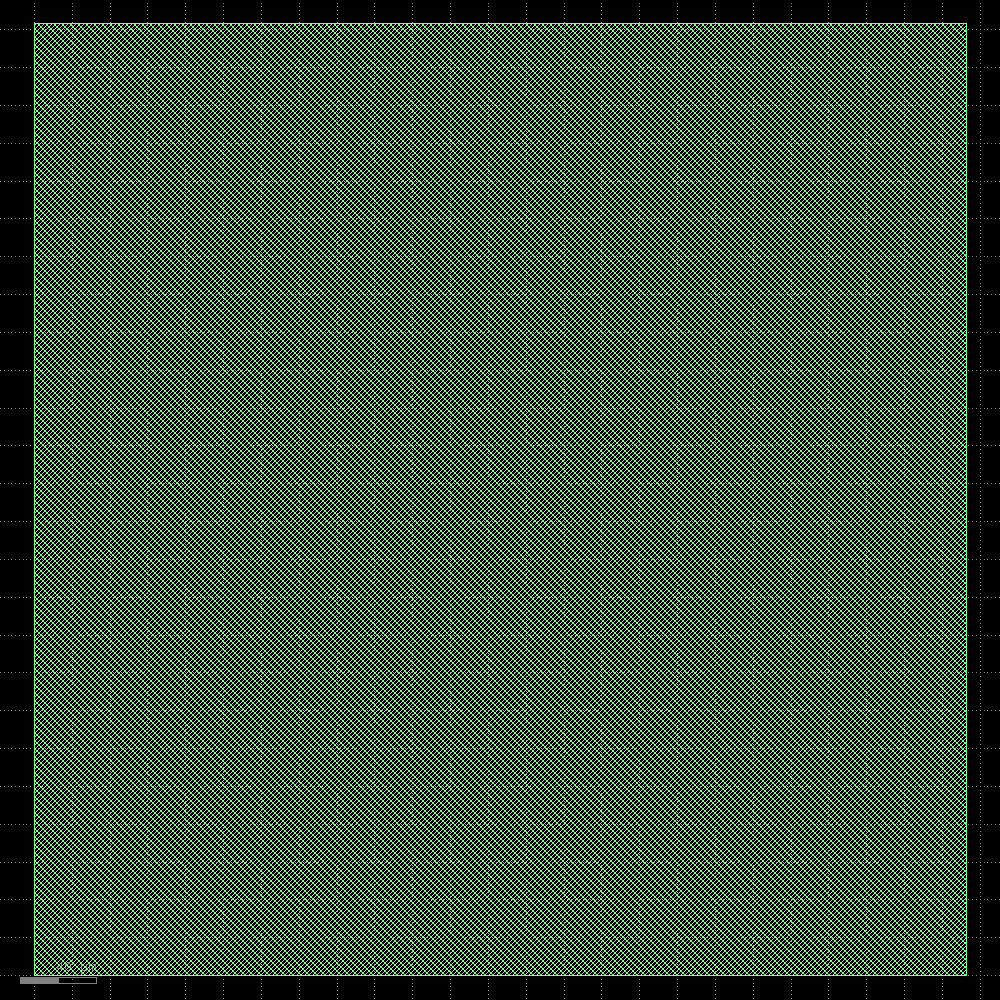

In [32]:
display(floorplan)

### Tap/Endcap Cell Insertion

This places two kinds of cells on the floorplan:

* End cap/boundary cells: Added at the beginning and end of each row. True to
  their name, they "cap off" the core area of a design.
* Tap cells: Placed in a polka dot-ish fashion across the rows. Tap cells
  connect VDD to the nwell and the psubstrate to VSS, which the majority of cells
  do not do themselves to save area- but if you go long enough without one such
  connection you end up with the cell "latching-up"; i.e.; refusing to switch
  back to LO from HI.

  There is a maximum distance between tap cells enforced as part of every
  foundry process.

In [33]:
TapEndcapInsertion = Step.factory.get("OpenROAD.TapEndcapInsertion")

tdi = TapEndcapInsertion(state_in=floorplan.state_out)
tdi.start()

─────────────────────────────────────────────── Tap/Decap Insertion ───────────────────────────────────────────────

[14:02:48] VERBOSE  Running 'OpenROAD.TapEndcapInsertion'…                                             ]8;id=695933;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=949464;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:02:48] VERBOSE  Logging subprocess to                                                              ]8;id=106266;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=649182;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=922034;file:///content/openlane_run/11-openroad-tapendcapinsertion/openroad-tapendcapinsertion.log\openlane_run/]8;;\]8;id=136949;file:///content/openlane_run/11-openroad-tapendcapinsertion/openroad-tapendcapinsertion.log\11]8;;\]8;id=922034;file:///content/openlane_run/11-openroad-tapendcapinsertion/openroad-tapendcapinsertion.log\-openroad-tapendcapinsertion/openroad-tapendcapinsertion.log]8;;\…                   

Reading OpenROAD database at '/content/openlane_run/10-openroad-floorplan/blabla.odb'…

Reading library file at '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO TAP-0004] Inserted 354 endcaps.

[INFO TAP-0005] Inserted 3311 tapcells.

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/11-openroad-tapendcapinsertion/blabla.odb'…

Writing netlist to '/content/openlane_run/11-openroad-tapendcapinsertion/blabla.nl.v'…

Writing powered netlist to '/content/openlane_run/11-openroad-tapendcapinsertion/blabla.pnl.v'…

Writing layout to '/content/openlane_run/11-openroad-tapendcapinsertion/blabla.def'…

Writing timing constraints to '/content/openlane_run/11-openroad-tapendcapinsertion/blabla.sdc'…

Format,Path
nl,openlane_run/11-openroad-tapendcapinsertion/blabla.nl.v
pnl,openlane_run/11-openroad-tapendcapinsertion/blabla.pnl.v
def,openlane_run/11-openroad-tapendcapinsertion/blabla.def
odb,openlane_run/11-openroad-tapendcapinsertion/blabla.odb
sdc,openlane_run/11-openroad-tapendcapinsertion/blabla.sdc


In [ ]:
display(tdi)

### I/O Placement

This places metal pins at the edges of the design corresponding to the top level
inputs and outputs for your design. These pins act as the interface with other
designs when you integrate it with other designs.

In [34]:
IOPlacement = Step.factory.get("OpenROAD.IOPlacement")

ioplace = IOPlacement(state_in=tdi.state_out)
ioplace.start()

────────────────────────────────────────────────── I/O Placement ──────────────────────────────────────────────────

[14:02:56] VERBOSE  Running 'OpenROAD.IOPlacement'…                                                    ]8;id=46324;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=60050;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[14:02:56] VERBOSE  Logging subprocess to                                                              ]8;id=327234;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=216101;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=550766;file:///content/openlane_run/12-openroad-ioplacement/openroad-ioplacement.log\openlane_run/]8;;\]8;id=651828;file:///content/openlane_run/12-openroad-ioplacement/openroad-ioplacement.log\12]8;;\]8;id=550766;file:///content/openlane_run/12-openroad-ioplacement/openroad-ioplacement.log\-openroad-ioplacement/openroad-ioplacement.log]8;;\…                                 

Reading OpenROAD database at '/content/openlane_run/11-openroad-tapendcapinsertion/blabla.odb'…

Reading library file at '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO] place_pins args: -min_distance 3

Found 0 macro blocks.

[14:02:57] ERROR    [PPL-0024] Number of IO pins (1420) exceeds maximum number of available         ]8;id=267010;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=887926;file:///content/openlane_ipynb/openlane/steps/openroad.py#232\232]8;;\
                    positions (602). Increase the die perimeter from 1992.46um to 4828.00um.                       

Error: ioplacer.tcl, 62 PPL-0024

StepError: OpenROAD.IOPlacement failed with the following errors:
[PPL-0024] Number of IO pins (1420) exceeds maximum number of available positions (602). Increase the die perimeter from 1992.46um to 4828.00um.

In [ ]:
display(ioplace)

### Generating the Power Distribution Network (PDN)

This creates the power distribution network for your design, which is essentially
a plaid pattern of horizontal and vertical "straps" across the design that is
then connected to the rails' VDD and VSS (via the tap cells.)

You can find an explanation of how the power distribution network works at this
link: https://openlane2.readthedocs.io/en/latest/usage/hardening_macros.html#pdn-generation

While we typically don't need to mess with the PDN too much, the SPM is a small
design, so we're going to need to make the plaid pattern formed by the PDN a bit
smaller.

In [14]:
GeneratePDN = Step.factory.get("OpenROAD.GeneratePDN")

pdn = GeneratePDN(
    state_in=ioplace.state_out,
    FP_PDN_VWIDTH=2,
    FP_PDN_HWIDTH=2,
    FP_PDN_VPITCH=30,
    FP_PDN_HPITCH=30,
)
pdn.start()

────────────────────────────────────── Power Distribution Network Generation ──────────────────────────────────────

[13:49:41] VERBOSE  Running 'OpenROAD.GeneratePDN'…                                                    ]8;id=291141;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=431238;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[13:49:41] INFO     'FP_PDN_CFG' not explicitly set, setting it to                                 ]8;id=227267;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=504742;file:///content/openlane_ipynb/openlane/steps/openroad.py#1171\1171]8;;\
                    /content/openlane_ipynb/openlane/scripts/openroad/common/pdn_cfg.tcl…                          

[13:49:41] VERBOSE  Logging subprocess to                                                              ]8;id=433981;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=841303;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=392233;file:///content/openlane_run/5-openroad-generatepdn/openroad-generatepdn.log\openlane_run/]8;;\]8;id=124719;file:///content/openlane_run/5-openroad-generatepdn/openroad-generatepdn.log\5]8;;\]8;id=392233;file:///content/openlane_run/5-openroad-generatepdn/openroad-generatepdn.log\-openroad-generatepdn/openroad-generatepdn.log]8;;\…                                  

Reading OpenROAD database at '/content/openlane_run/4-openroad-ioplacement/spm.odb'…

Reading library file at '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO] Setting global connections...

[INFO PDN-0001] Inserting grid: stdcell_grid

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/5-openroad-generatepdn/spm.odb'…

Writing netlist to '/content/openlane_run/5-openroad-generatepdn/spm.nl.v'…

Writing powered netlist to '/content/openlane_run/5-openroad-generatepdn/spm.pnl.v'…

Writing layout to '/content/openlane_run/5-openroad-generatepdn/spm.def'…

Writing timing constraints to '/content/openlane_run/5-openroad-generatepdn/spm.sdc'…

[INFO PSM-0040] All shapes on net VPWR are connected.

[INFO PSM-0040] All shapes on net VGND are connected.

Format,Path
nl,openlane_run/5-openroad-generatepdn/spm.nl.v
pnl,openlane_run/5-openroad-generatepdn/spm.pnl.v
def,openlane_run/5-openroad-generatepdn/spm.def
odb,openlane_run/5-openroad-generatepdn/spm.odb
sdc,openlane_run/5-openroad-generatepdn/spm.sdc


In [ ]:
display(pdn)

### Global Placement

Global Placement is deciding on a fuzzy, non-final location for each of the cells,
with the aim of minimizing the distance between cells that are connected
together (more specifically, the total length of the not-yet-created wires that
will connect them).

As you will see in the `.display()` in the second cell below, the placement is
considered "illegal", i.e., not properly aligned with the cell placement grid.
This is addressed by "Detailed Placement", also referred to as "placement
legalization", which is the next step.

In [15]:
GlobalPlacement = Step.factory.get("OpenROAD.GlobalPlacement")

gpl = GlobalPlacement(state_in=pdn.state_out)
gpl.start()

──────────────────────────────────────────────── Global Placement ─────────────────────────────────────────────────

[13:49:47] VERBOSE  Running 'OpenROAD.GlobalPlacement'…                                                ]8;id=317382;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=327112;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[13:49:47] INFO     'PL_TARGET_DENSITY_PCT' not explicitly set, using dynamically calculated       ]8;id=612943;file:///content/openlane_ipynb/openlane/steps/openroad.py\openroad.py]8;;\:]8;id=663928;file:///content/openlane_ipynb/openlane/steps/openroad.py#1257\1257]8;;\
                    target density: 62.659100…                                                                     

[13:49:47] VERBOSE  Logging subprocess to                                                              ]8;id=130252;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=884279;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=408931;file:///content/openlane_run/6-openroad-globalplacement/openroad-globalplacement.log\openlane_run/]8;;\]8;id=794425;file:///content/openlane_run/6-openroad-globalplacement/openroad-globalplacement.log\6]8;;\]8;id=408931;file:///content/openlane_run/6-openroad-globalplacement/openroad-globalplacement.log\-openroad-globalplacement/openroad-globalplacement.log]8;;\…                          

Reading OpenROAD database at '/content/openlane_run/5-openroad-generatepdn/spm.odb'…

Reading library file at '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO] Setting RC values…

[INFO] Setting signal min routing layer to: met1 and clock min routing layer to met1.

[INFO] Setting signal max routing layer to: met5 and clock max routing layer to met5.

[INFO GPL-0002] DBU: 1000

[INFO GPL-0003] SiteSize: (  0.460  2.720 ) um

[INFO GPL-0004] CoreBBox: (  5.520 10.880 ) ( 90.620 95.200 ) um

[INFO GPL-0006] NumInstances:               447

[INFO GPL-0007] NumPlaceInstances:          286

[INFO GPL-0008] NumFixedInstances:          161

[INFO GPL-0009] NumDummyInstances:            0

[INFO GPL-0010] NumNets:                    321

[INFO GPL-0011] NumPins:                    958

[INFO GPL-0012] DieBBox:  (  0.000  0.000 ) ( 96.535 107.255 ) um

[INFO GPL-0013] CoreBBox: (  5.520 10.880 ) ( 90.620 95.200 ) um

[INFO GPL-0016] CoreArea:              7175.632 um^2

[INFO GPL-0017] NonPlaceInstsArea:      356.592 um^2

[INFO GPL-0018] PlaceInstsArea:        3654.755 um^2

[INFO GPL-0019] Util:                    53.596 %

[INFO GPL-0020] StdInstsArea:          3654.755 um^2

[INFO GPL-0021] MacroInstsArea:           0.000 um^2

[InitialPlace]  Iter: 1 CG residual: 0.00000011 HPWL: 5542300

[InitialPlace]  Iter: 2 CG residual: 0.00000011 HPWL: 4832507

[InitialPlace]  Iter: 3 CG residual: 0.00000004 HPWL: 4599321

[InitialPlace]  Iter: 4 CG residual: 0.00000011 HPWL: 4534012

[InitialPlace]  Iter: 5 CG residual: 0.00000009 HPWL: 4511736

[INFO GPL-0031] FillerInit:NumGCells:       335

[INFO GPL-0032] FillerInit:NumGNets:        321

[INFO GPL-0033] FillerInit:NumGPins:        958

[INFO GPL-0023] TargetDensity:            0.627

[INFO GPL-0024] AvrgPlaceInstArea:       12.779 um^2

[INFO GPL-0025] IdealBinArea:            20.394 um^2

[INFO GPL-0026] IdealBinCnt:                351

[INFO GPL-0027] TotalBinArea:          7175.632 um^2

[INFO GPL-0028] BinCnt:        16     16

[INFO GPL-0029] BinSize: (  5.319  5.270 )

[INFO GPL-0030] NumBins: 256

[NesterovSolve] Iter:    1 overflow: 0.824 HPWL: 2052447

[NesterovSolve] Iter:   10 overflow: 0.788 HPWL: 2151962

[INFO GPL-0100] worst slack 6.66e-09

[INFO GPL-0103] Weighted 31 nets.

[NesterovSolve] Iter:   20 overflow: 0.765 HPWL: 2189570

[NesterovSolve] Iter:   30 overflow: 0.766 HPWL: 2187464

[NesterovSolve] Iter:   40 overflow: 0.773 HPWL: 2174877

[NesterovSolve] Iter:   50 overflow: 0.769 HPWL: 2178008

[NesterovSolve] Iter:   60 overflow: 0.768 HPWL: 2181889

[NesterovSolve] Iter:   70 overflow: 0.769 HPWL: 2178980

[NesterovSolve] Iter:   80 overflow: 0.769 HPWL: 2177669

[NesterovSolve] Iter:   90 overflow: 0.767 HPWL: 2178157

[NesterovSolve] Iter:  100 overflow: 0.767 HPWL: 2176547

[NesterovSolve] Iter:  110 overflow: 0.765 HPWL: 2173792

[NesterovSolve] Iter:  120 overflow: 0.762 HPWL: 2171951

[NesterovSolve] Iter:  130 overflow: 0.758 HPWL: 2169764

[NesterovSolve] Iter:  140 overflow: 0.752 HPWL: 2168616

[NesterovSolve] Iter:  150 overflow: 0.742 HPWL: 2163236

[NesterovSolve] Iter:  160 overflow: 0.724 HPWL: 2154633

[NesterovSolve] Iter:  170 overflow: 0.713 HPWL: 2180778

[NesterovSolve] Iter:  180 overflow: 0.700 HPWL: 2216838

[NesterovSolve] Iter:  190 overflow: 0.660 HPWL: 2289818

[INFO GPL-0100] worst slack 6.63e-09

[INFO GPL-0103] Weighted 31 nets.

[NesterovSolve] Iter:  200 overflow: 0.627 HPWL: 2375546

[NesterovSolve] Snapshot saved at iter = 202

[NesterovSolve] Iter:  210 overflow: 0.573 HPWL: 2420258

[NesterovSolve] Iter:  220 overflow: 0.527 HPWL: 2514472

[INFO GPL-0100] worst slack 6.61e-09

[INFO GPL-0103] Weighted 31 nets.

[NesterovSolve] Iter:  230 overflow: 0.458 HPWL: 2585636

[NesterovSolve] Iter:  240 overflow: 0.403 HPWL: 2626328

[NesterovSolve] Iter:  250 overflow: 0.354 HPWL: 2684941

[NesterovSolve] Iter:  260 overflow: 0.338 HPWL: 2710570

[NesterovSolve] Iter:  270 overflow: 0.317 HPWL: 2715465

[NesterovSolve] Iter:  280 overflow: 0.295 HPWL: 2753234

[INFO GPL-0100] worst slack 6.57e-09

[INFO GPL-0103] Weighted 31 nets.

[NesterovSolve] Iter:  290 overflow: 0.282 HPWL: 2771830

[NesterovSolve] Iter:  300 overflow: 0.266 HPWL: 2788007

[NesterovSolve] Iter:  310 overflow: 0.251 HPWL: 2804752

[NesterovSolve] Iter:  320 overflow: 0.235 HPWL: 2834291

[NesterovSolve] Iter:  330 overflow: 0.216 HPWL: 2876494

[INFO GPL-0100] worst slack 6.55e-09

[INFO GPL-0103] Weighted 31 nets.

[INFO GPL-0075] Routability numCall: 1 inflationIterCnt: 1 bloatIterCnt: 0

[INFO GPL-0036] TileBBox: (    0    0 ) ( 6900 6900 ) DBU

[INFO GPL-0038] TileCnt:      13   15

[INFO GPL-0039] numRoutingLayers: 6

[INFO GPL-0040] NumTiles: 195

[INFO GPL-0063] TotalRouteOverflowH2: 0

[INFO GPL-0064] TotalRouteOverflowV2: 0

[INFO GPL-0065] OverflowTileCnt2: 0

[INFO GPL-0066] 0.5%RC: 1.0000

[INFO GPL-0067] 1.0%RC: 0.9750

[INFO GPL-0068] 2.0%RC: 0.9455

[INFO GPL-0069] 5.0%RC: 0.8833

[INFO GPL-0070] 0.5rcK: 1

[INFO GPL-0071] 1.0rcK: 1

[INFO GPL-0072] 2.0rcK: 0

[INFO GPL-0073] 5.0rcK: 0

[INFO GPL-0074] FinalRC: 0.9875

[INFO GPL-0077] FinalRC lower than targetRC(1), routability not needed.

[NesterovSolve] Iter:  340 overflow: 0.189 HPWL: 2902328

[NesterovSolve] Iter:  350 overflow: 0.166 HPWL: 2925141

[NesterovSolve] Iter:  360 overflow: 0.144 HPWL: 2956636

[INFO GPL-0100] worst slack 6.55e-09

[INFO GPL-0103] Weighted 31 nets.

[NesterovSolve] Iter:  370 overflow: 0.114 HPWL: 2982186

[NesterovSolve] Finished with Overflow: 0.098805

[INFO] Setting RC values…

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/6-openroad-globalplacement/spm.odb'…

Writing netlist to '/content/openlane_run/6-openroad-globalplacement/spm.nl.v'…

Writing powered netlist to '/content/openlane_run/6-openroad-globalplacement/spm.pnl.v'…

Writing layout to '/content/openlane_run/6-openroad-globalplacement/spm.def'…

Writing timing constraints to '/content/openlane_run/6-openroad-globalplacement/spm.sdc'…

Format,Path
nl,openlane_run/6-openroad-globalplacement/spm.nl.v
pnl,openlane_run/6-openroad-globalplacement/spm.pnl.v
def,openlane_run/6-openroad-globalplacement/spm.def
odb,openlane_run/6-openroad-globalplacement/spm.odb
sdc,openlane_run/6-openroad-globalplacement/spm.sdc


──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[13:49:54] VERBOSE  Running 'KLayout.Render'…                                                          ]8;id=629054;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=458767;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[13:49:54] VERBOSE  Logging subprocess to ]8;id=313075;file:///tmp/openlane_klayout_tmp_eun_xtyq/klayout-render.log\..]8;;\]8;id=126848;file:///tmp/openlane_klayout_tmp_eun_xtyq/klayout-render.log\/tmp/openlane_klayout_tmp_eun_xtyq/]8;;\]8;id=982202;file:///tmp/openlane_klayout_tmp_eun_xtyq/klayout-render.log\klayout-render.log]8;;\…     ]8;id=444328;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=12513;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

#### Time Elapsed: 2.64s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
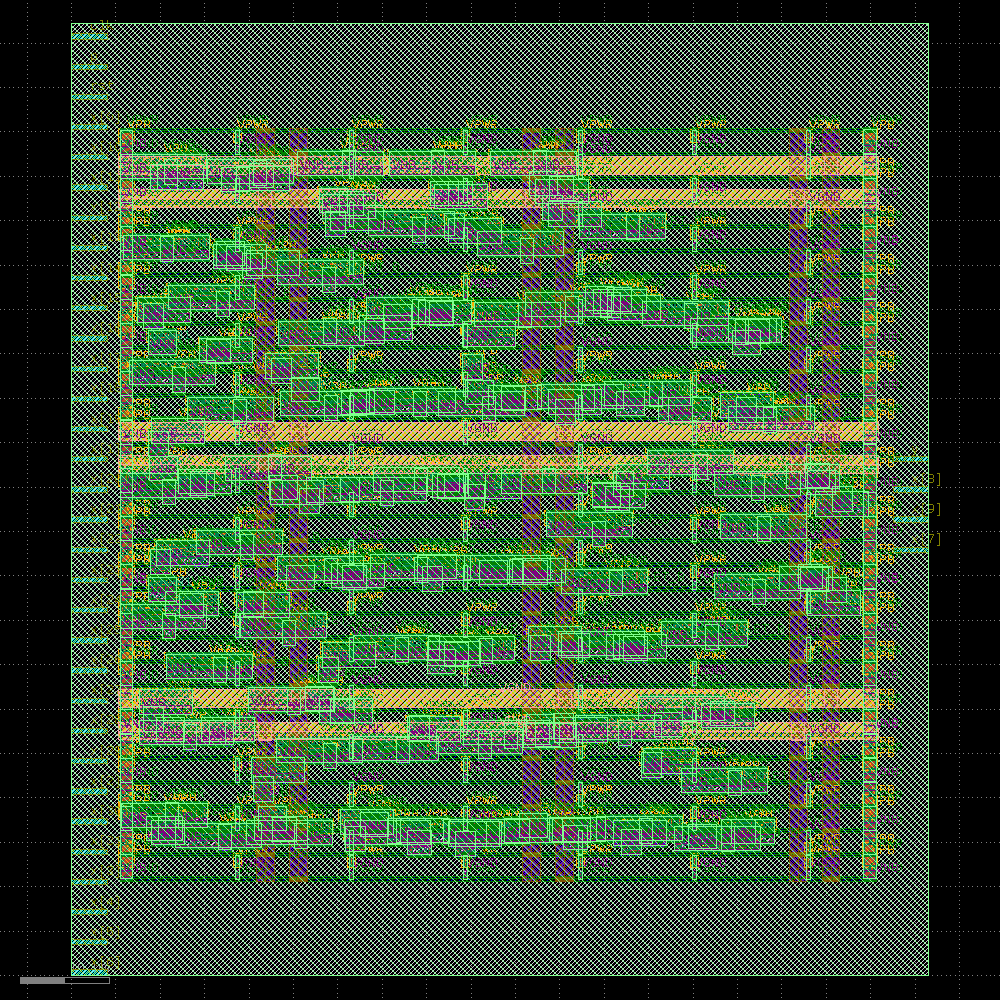

In [16]:
display(gpl)

### Detailed Placement

This aligns the fuzzy placement from before with the grid, "legalizing" it.

In [17]:
DetailedPlacement = Step.factory.get("OpenROAD.DetailedPlacement")

dpl = DetailedPlacement(state_in=gpl.state_out)
dpl.start()

─────────────────────────────────────────────── Detailed Placement ────────────────────────────────────────────────

[13:52:07] VERBOSE  Running 'OpenROAD.DetailedPlacement'…                                              ]8;id=107126;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=819783;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[13:52:07] VERBOSE  Logging subprocess to                                                              ]8;id=821341;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=471686;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\
                    ]8;id=861444;file:///content/openlane_run/7-openroad-detailedplacement/openroad-detailedplacement.log\openlane_run/]8;;\]8;id=172469;file:///content/openlane_run/7-openroad-detailedplacement/openroad-detailedplacement.log\7]8;;\]8;id=861444;file:///content/openlane_run/7-openroad-detailedplacement/openroad-detailedplacement.log\-openroad-detailedplacement/openroad-detailedplacement.log]8;;\…                      

Reading OpenROAD database at '/content/openlane_run/6-openroad-globalplacement/spm.odb'…

Reading library file at '/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

Placement Analysis

---------------------------------

total displacement        795.9 u

average displacement        1.8 u

max displacement            8.3 u

original HPWL            3036.3 u

legalized HPWL           4089.9 u

delta HPWL                   35 %

[INFO DPL-0020] Mirrored 106 instances

[INFO DPL-0021] HPWL before            4089.9 u

[INFO DPL-0022] HPWL after             3861.5 u

[INFO DPL-0023] HPWL delta               -5.6 %

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/7-openroad-detailedplacement/spm.odb'…

Writing netlist to '/content/openlane_run/7-openroad-detailedplacement/spm.nl.v'…

Writing powered netlist to '/content/openlane_run/7-openroad-detailedplacement/spm.pnl.v'…

Writing layout to '/content/openlane_run/7-openroad-detailedplacement/spm.def'…

Writing timing constraints to '/content/openlane_run/7-openroad-detailedplacement/spm.sdc'…

Format,Path
nl,openlane_run/7-openroad-detailedplacement/spm.nl.v
pnl,openlane_run/7-openroad-detailedplacement/spm.pnl.v
def,openlane_run/7-openroad-detailedplacement/spm.def
odb,openlane_run/7-openroad-detailedplacement/spm.odb
sdc,openlane_run/7-openroad-detailedplacement/spm.sdc


In [ ]:
display(dpl)

### Clock Tree Synthesis (CTS)

With the cells now having a final placement, we can go ahead and create what
is known as the clock tree, i.e., the hierarchical set of buffers used
for clock signal to minimize what is known as "clock skew"- variable delay
of the clock cycle from register to register because of factors such as metal
wire length, clock load (number of gates connected to the same clock buffer,)
et cetera.

The CTS step creates the cells and places the between the gaps in the detailed
placement above.

In [18]:
CTS = Step.factory.get("OpenROAD.CTS")

cts = CTS(state_in=dpl.state_out)
cts.start()

────────────────────────────────────────────── Clock Tree Synthesis ───────────────────────────────────────────────

[13:52:13] VERBOSE  Running 'OpenROAD.CTS'…                                                            ]8;id=392760;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=918546;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[13:52:14] VERBOSE  Logging subprocess to ]8;id=403369;file:///content/openlane_run/8-openroad-cts/openroad-cts.log\openlane_run/]8;;\]8;id=551816;file:///content/openlane_run/8-openroad-cts/openroad-cts.log\8]8;;\]8;id=403369;file:///content/openlane_run/8-openroad-cts/openroad-cts.log\-openroad-cts/openroad-cts.log]8;;\…                ]8;id=290199;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=219149;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

Reading timing models for corner nom_tt_025C_1v80…

Reading timing library for the 'nom_tt_025C_1v80' corner at                                                        
'/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading timing models for corner nom_ff_n40C_1v95…

Reading timing library for the 'nom_ff_n40C_1v95' corner at                                                        
'/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__ff_n40C_1v95.lib'…

Reading timing models for corner nom_ss_100C_1v60…

Reading timing library for the 'nom_ss_100C_1v60' corner at                                                        
'/root/.volare/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__ss_100C_1v60.lib'…

Reading OpenROAD database at '/content/openlane_run/7-openroad-detailedplacement/spm.odb'…

Reading design constraints file at '/content/openlane_ipynb/openlane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO] Setting RC values…

[INFO] Configuring cts characterization…

[INFO] Performing clock tree synthesis…

[INFO] Looking for the following net(s): clk

[INFO] Running Clock Tree Synthesis…

[INFO CTS-0050] Root buffer is sky130_fd_sc_hd__clkbuf_16.

[INFO CTS-0051] Sink buffer is sky130_fd_sc_hd__clkbuf_8.

[INFO CTS-0052] The following clock buffers will be used for CTS:

sky130_fd_sc_hd__clkbuf_2

sky130_fd_sc_hd__clkbuf_4

sky130_fd_sc_hd__clkbuf_8

[INFO CTS-0049] Characterization buffer is sky130_fd_sc_hd__clkbuf_8.

[INFO CTS-0007] Net "clk" found for clock "clk".

[INFO CTS-0010]  Clock net "clk" has 64 sinks.

[INFO CTS-0008] TritonCTS found 1 clock nets.

[INFO CTS-0097] Characterization used 3 buffer(s) types.

[INFO CTS-0200] 0 placement blockages have been identified.

[INFO CTS-0201] 0 placed hard macros will be treated like blockages.

[INFO CTS-0027] Generating H-Tree topology for net clk.

[INFO CTS-0028]  Total number of sinks: 64.

[INFO CTS-0029]  Sinks will be clustered in groups of up to 25 and with maximum cluster diameter of 50.0 um.

[INFO CTS-0030]  Number of static layers: 0.

[INFO CTS-0020]  Wire segment unit: 13600  dbu (13 um).

[INFO CTS-0023]  Original sink region: [(7165, 15020), (79775, 91180)].

[INFO CTS-0024]  Normalized sink region: [(0.526838, 1.10441), (5.86581, 6.70441)].

[INFO CTS-0025]     Width:  5.3390.

[INFO CTS-0026]     Height: 5.6000.

Level 1

Direction: Vertical

Sinks per sub-region: 32

Sub-region size: 5.3390 X 2.8000

[INFO CTS-0034]     Segment length (rounded): 1.

Level 2

Direction: Horizontal

Sinks per sub-region: 16

Sub-region size: 2.6695 X 2.8000

[INFO CTS-0034]     Segment length (rounded): 1.

Level 3

Direction: Vertical

Sinks per sub-region: 8

Sub-region size: 2.6695 X 1.4000

[INFO CTS-0034]     Segment length (rounded): 1.

[INFO CTS-0032]  Stop criterion found. Max number of sinks is 15.

[INFO CTS-0035]  Number of sinks covered: 64.

[INFO CTS-0018]     Created 9 clock buffers.

[INFO CTS-0012]     Minimum number of buffers in the clock path: 2.

[INFO CTS-0013]     Maximum number of buffers in the clock path: 2.

[INFO CTS-0015]     Created 9 clock nets.

[INFO CTS-0016]     Fanout distribution for the current clock = 7:2, 8:4, 9:2..

[INFO CTS-0017]     Max level of the clock tree: 3.

[INFO CTS-0098] Clock net "clk"

[INFO CTS-0099]  Sinks 70

[INFO CTS-0100]  Leaf buffers 0

[INFO CTS-0101]  Average sink wire length 144.34 um

[INFO CTS-0102]  Path depth 2 - 2

[INFO CTS-0207]  Leaf load cells 6

[INFO] Repairing long wires on clock nets…

[INFO RSZ-0058] Using max wire length 6335um.

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/8-openroad-cts/spm.odb'…

Writing netlist to '/content/openlane_run/8-openroad-cts/spm.nl.v'…

Writing powered netlist to '/content/openlane_run/8-openroad-cts/spm.pnl.v'…

Writing layout to '/content/openlane_run/8-openroad-cts/spm.def'…

Writing timing constraints to '/content/openlane_run/8-openroad-cts/spm.sdc'…

[INFO] Legalizing…

Placement Analysis

---------------------------------

total displacement        110.9 u

average displacement        0.2 u

max displacement            7.0 u

original HPWL            4237.7 u

legalized HPWL           4604.3 u

delta HPWL                    9 %

[INFO DPL-0020] Mirrored 107 instances

[INFO DPL-0021] HPWL before            4604.3 u

[INFO DPL-0022] HPWL after             4347.5 u

[INFO DPL-0023] HPWL delta               -5.6 %

Setting global connections for newly added cells…

[INFO] Setting global connections...

Writing OpenROAD database to '/content/openlane_run/8-openroad-cts/spm.odb'…

Writing netlist to '/content/openlane_run/8-openroad-cts/spm.nl.v'…

Writing powered netlist to '/content/openlane_run/8-openroad-cts/spm.pnl.v'…

Writing layout to '/content/openlane_run/8-openroad-cts/spm.def'…

Writing timing constraints to '/content/openlane_run/8-openroad-cts/spm.sdc'…

Format,Path
nl,openlane_run/8-openroad-cts/spm.nl.v
pnl,openlane_run/8-openroad-cts/spm.pnl.v
def,openlane_run/8-openroad-cts/spm.def
odb,openlane_run/8-openroad-cts/spm.odb
sdc,openlane_run/8-openroad-cts/spm.sdc


──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[13:52:30] VERBOSE  Running 'KLayout.Render'…                                                          ]8;id=218604;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=750157;file:///content/openlane_ipynb/openlane/steps/step.py#1088\1088]8;;\

[13:52:30] VERBOSE  Logging subprocess to ]8;id=643149;file:///tmp/openlane_klayout_tmp_2hj7xvr0/klayout-render.log\..]8;;\]8;id=677676;file:///tmp/openlane_klayout_tmp_2hj7xvr0/klayout-render.log\/tmp/openlane_klayout_tmp_2hj7xvr0/]8;;\]8;id=582709;file:///tmp/openlane_klayout_tmp_2hj7xvr0/klayout-render.log\klayout-render.log]8;;\…     ]8;id=674088;file:///content/openlane_ipynb/openlane/steps/step.py\step.py]8;;\:]8;id=346543;file:///content/openlane_ipynb/openlane/steps/step.py#1268\1268]8;;\

#### Time Elapsed: 12.93s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
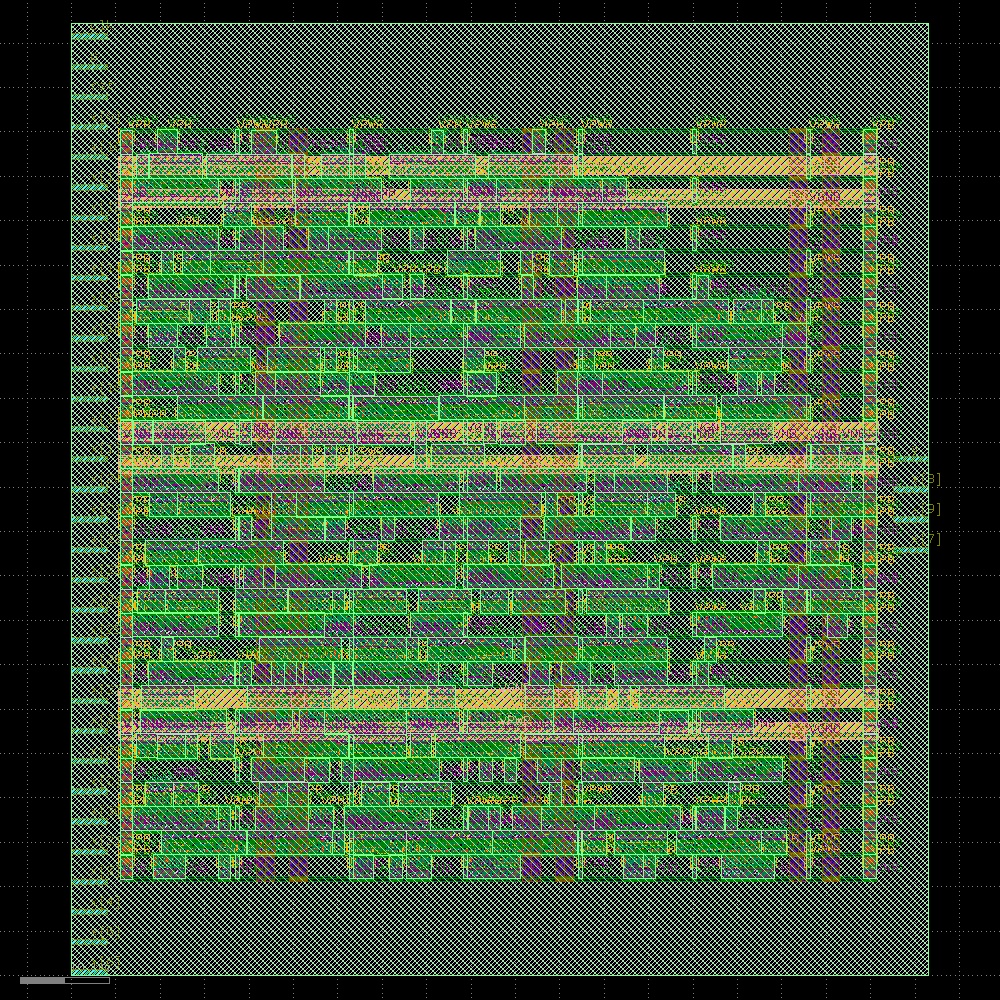

In [19]:
display(cts)

### Global Routing

Global routing "plans" the routes the wires between two gates (or gates and
I/O pins/the PDN) will take. The results of global routing (which are called
"routing guides") are stored in internal data structures and have no effect on
the actual design, so there is no `display()` statement.

In [ ]:
GlobalRouting = Step.factory.get("OpenROAD.GlobalRouting")

grt = GlobalRouting(state_in=cts.state_out)
grt.start()

### Detailed Routing

Detailed routing uses the guides from Global Routing to actually create wires
on the metal layers and connect the gates, making the connections finally physical.

This is typically the longest step in the flow.

In [ ]:
DetailedRouting = Step.factory.get("OpenROAD.DetailedRouting")

drt = DetailedRouting(state_in=grt.state_out)
drt.start()

In [ ]:
display(drt)

### Fill Insertion

Finally, as we're done placing all the essential cells, the only thing left to
do is fill in the gaps.

We prioritize the use of decap (decoupling capacitor) cells, which
further supports the power distribution network, but when there aren't any
small enough cells, we just use regular fill cells.

In [ ]:
FillInsertion = Step.factory.get("OpenROAD.FillInsertion")

fill = FillInsertion(state_in=drt.state_out)
fill.start()

In [ ]:
display(fill)

### Parasitics Extraction a.k.a. Resistance/Capacitance Extraction (RCX)

This step does not alter the design- rather, it computes the
[Parasitic elements](https://en.wikipedia.org/wiki/Parasitic_element_(electrical_networks))
of the circuit, which have an effect of timing, as we prepare to do the final
timing analysis.

The parasitic elements are saved in the **Standard Parasitics Exchange Format**,
or SPEF. OpenLane creates a SPEF file for each interconnect corner as described in
the [Corners and STA](https://openlane2.readthedocs.io/en/latest/usage/corners_and_sta.html)
section of the documentation.

In [ ]:
RCX = Step.factory.get("OpenROAD.RCX")

rcx = RCX(state_in=fill.state_out)
rcx.start()

### Static Timing Analysis (Post-PnR)

STA is a process that verifies that a chip meets certain constraints on clock
and data timings to run at its rated clock speed. See [Corners and STA](https://openlane2.readthedocs.io/en/latest/usage/corners_and_sta.html)
in the documentation for more info.

---

This step generates two kinds of files:
* `.lib`: Liberty™-compatible Library files. Can be used to do static timing
  analysis when creating a design with this design as a sub-macro.
* `.sdf`: Standard Delay Format. Can be used with certain simulation software
  to do *dynamic* timing analysis.

Unfortunately, the `.lib` files coming out of OpenLane right now are not super
reliable for timing purposes and are only provided for completeness.
When using OpenLane-created macros withing other designs, it is best to use the
macro's final netlist and extracted parasitics instead.

In [ ]:
STAPostPNR = Step.factory.get("OpenROAD.STAPostPNR")

sta_post_pnr = STAPostPNR(state_in=rcx.state_out)
sta_post_pnr.start()

### Stream-out

Stream-out is the process of converting the designs from the abstract formats
using during floorplanning, placement and routing into a concrete format called
GDSII (lit. Graphic Design System 2), which is the final file that is then sent
for fabrication.

In [ ]:
StreamOut = Step.factory.get("KLayout.StreamOut")

gds = StreamOut(state_in=sta_post_pnr.state_out)
gds.start()

In [ ]:
display(gds)

### Design Rule Checks (DRC)

DRC determines that the final layout does not violate any of the rules set by
the foundry to ensure the design is actually manufacturable- for example,
not enough space between two wires, *too much* space between tap cells, and so
on.

A design not passing DRC will typically be rejected by the foundry, who
also run DRC on their side.

In [ ]:
DRC = Step.factory.get("Magic.DRC")

drc = DRC(state_in=gds.state_out)
drc.start()

### SPICE Extraction for Layout vs. Schematic Check

This step tries to reconstruct a SPICE netlist from the GDSII file, so it can
later be used for the **Layout vs. Schematic** (LVS) check.

In [ ]:
SpiceExtraction = Step.factory.get("Magic.SpiceExtraction")

spx = SpiceExtraction(state_in=drc.state_out)
spx.start()

### Layout vs. Schematic (LVS)

A comparison between the final Verilog netlist (from PnR) and the final
SPICE netlist (extracted.)

This check effectively compares the physically implemented circuit to the final
Verilog netlist output by OpenROAD.

The idea is, if there are any disconnects, shorts or other mismatches in the
physical implementation that do not exist in the logical view of the design,
they would be caught at this step.

Common issues that result in LVS violations include:
* Lack of fill cells or tap cells in the design
* Two unrelated signals to be shorted, or a wire to be disconnected (most
  commonly seen with misconfigured PDN)

Chips with LVS errors are typically dead on arrival.

In [ ]:
LVS = Step.factory.get("Netgen.LVS")

lvs = LVS(state_in=spx.state_out)
lvs.start()